# PNEUMONIA

Pnömoni bir veya iki akciğerde görülen bir enfeksiyondur. Bakteriler, virüsler ve mantarlar buna neden olur. Enfeksiyon, akciğerlerinizdeki alveol adı verilen hava keseciklerinde iltihaplanmaya neden olur. Alveoller sıvı veya irinle dolar ve nefes almayı zorlaştırır.

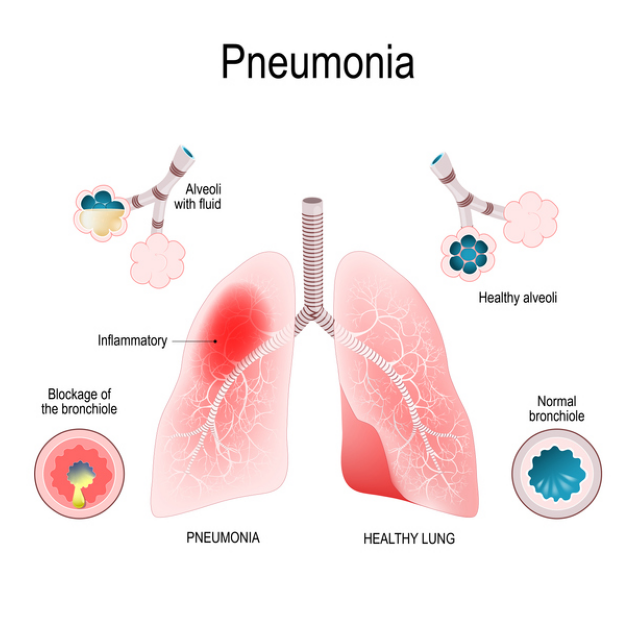

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
img = Image.open('pneumonia.png')
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img)
ax.axis('off')
plt.show()

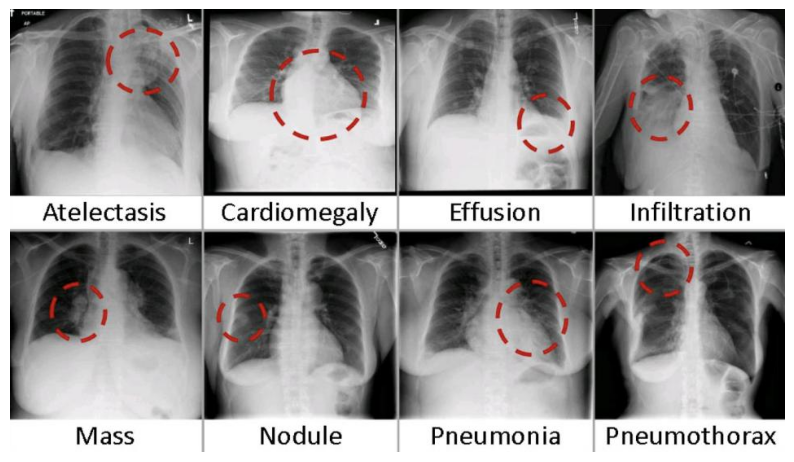

In [2]:
img = Image.open('tespit.jpg')
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img)
ax.axis('off')
plt.show()

Pneumonia neden olabilecek çeşitli enfeksiyon etkenleri vardır.

# Bacterial Pneumonia

Bakteriyel pnömoninin en yaygın nedeni Streptococcus pneumoniae'dır. Diğer nedenler şunlardır:

Mycoplasma pneumoniae

Haemophilus influenzae

Legionella pneumophila

# Viral Pneumonia

Influenza (flu)

Respiratory syncytial virus (RSV)

Rhinoviruses (common cold)

# Fungal Pneumonia

Topraktan veya kuş dışkısından gelen mantarlar zatürreye neden olabilir. 

Genellikle bağışıklık sistemi zayıflamış kişilerde zatürreye neden olurlar. 

Zatürreye neden olabilen mantar örnekleri şunlardır:

Pneumocystis jirovecii

Cryptococcus species

Histoplasmosis species

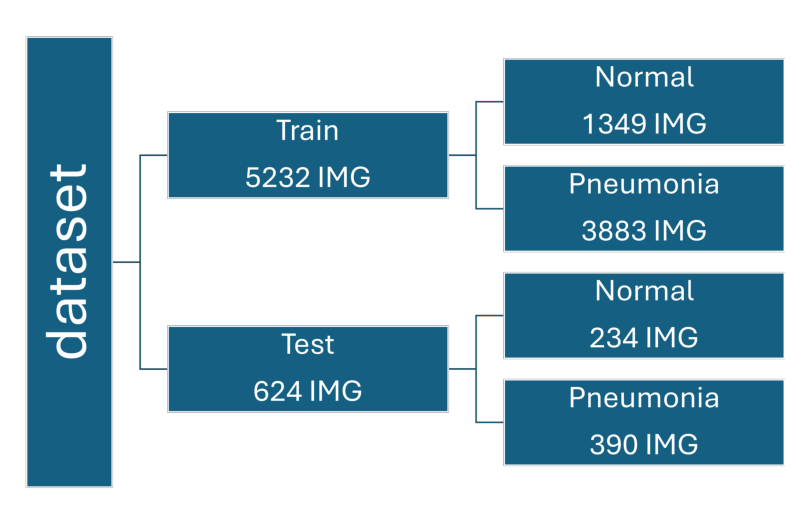

In [3]:
img = Image.open('DATA.png')
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img)
ax.axis('off')
plt.show()

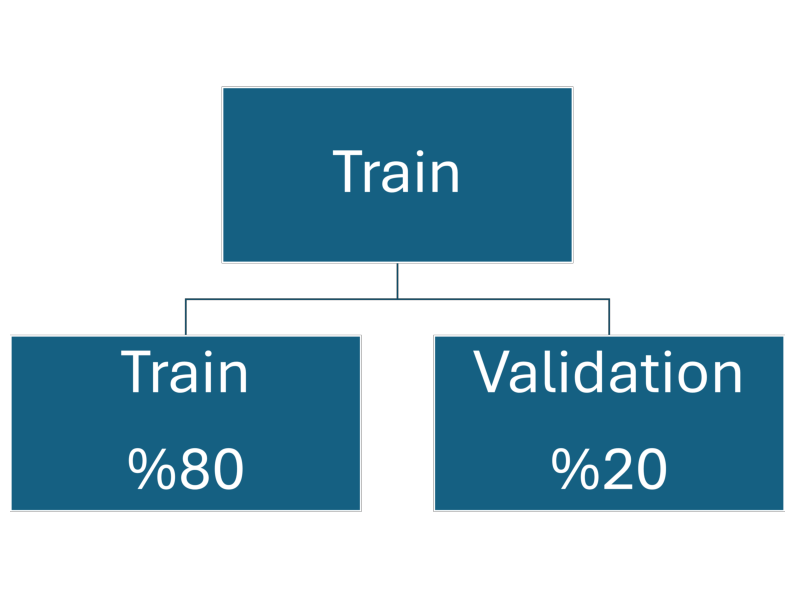

In [4]:
img = Image.open('split.png')
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img)
ax.axis('off')
plt.show()

# Eğitmeyi Planladığım Yapay Sinir Ağları

## ANN

## CNN

## VGG16

## VGG19

## AlexNet

## ResNet

## GoogLeNet

## Xception

In [5]:
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, auc
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential,Model
from tensorflow.keras.models import load_model
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization,Input
from keras.layers import concatenate,MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications import ResNet50V2
from keras.optimizers import Adam, Adamax
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
import tensorflow as tf
from tensorflow.keras import layers, models
from imutils import paths
import seaborn as sns
import pandas as pd
import optuna

(1858, 2090)


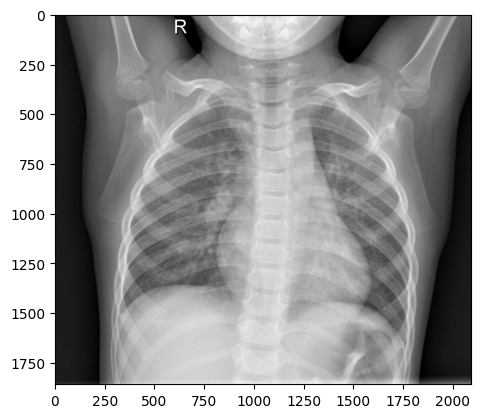

In [7]:
img = Image.open(os.path.join('train/NORMAL', 'IM-0115-0001.jpeg'))
print(np.asarray(img, dtype=np.uint8).shape)
plt.imshow(img, cmap='gray')

(439, 712, 3)


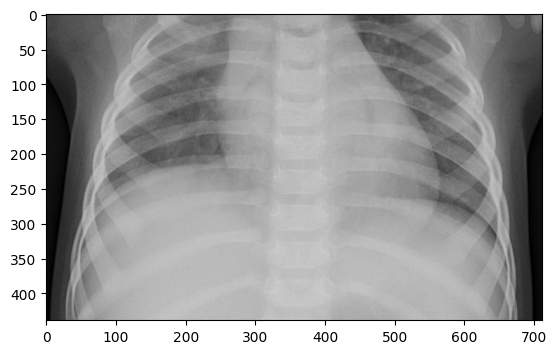

In [8]:
img = Image.open(os.path.join('train/PNEUMONIA', 'person1_bacteria_1.jpeg'))
print(np.asarray(img, dtype=np.uint8).shape)
plt.imshow(img, cmap='gray')

In [9]:
# train klasöründeki normal görsellerin ve etiket değerlerinin dizilere aktarılması
imagePaths_normal = list(paths.list_images(os.path.join('train/NORMAL')))

In [10]:
data_0 = []
labels_0 = []
for imagePath in imagePaths_normal:
    image = Image.open(imagePath)
    image = image.convert("RGB")
    image = image.resize((224, 224), Image.BICUBIC)
    data_0.append(image)
    labels_0.append(0)

In [11]:
# train klasöründeki PNEUMONIA görsellerin ve etiket değerlerinin dizilere aktarılması
imagePaths_pneumonia = list(paths.list_images(os.path.join('train/PNEUMONIA')))

In [12]:
data_1 = []
labels_1 = []
for imagePath in imagePaths_pneumonia:
    image = Image.open(imagePath)
    image = image.convert("RGB")
    image = image.resize((224, 224), Image.BICUBIC)
    data_1.append(image)
    labels_1.append(1)

In [13]:
# test klasöründeki normal görsellerin ve etiket değerlerinin dizilere aktarılması
imagePaths_normal_test = list(paths.list_images(os.path.join('test/NORMAL')))

In [14]:
data_test = []
labels_test = []
for imagePath in imagePaths_normal_test:
    image = Image.open(imagePath)
    image = image.convert("RGB")
    image = image.resize((224, 224), Image.BICUBIC)
    data_test.append(image)
    labels_test.append(0)

In [15]:
# test klasöründeki PNEUMONIA görsellerin ve etiket değerlerinin dizilere aktarılması
imagePaths_PNEUMONIA_test = list(paths.list_images(os.path.join('test/PNEUMONIA')))

In [16]:
for imagePath in imagePaths_PNEUMONIA_test:
    image = Image.open(imagePath)
    image = image.convert("RGB")
    image = image.resize((224, 224), Image.BICUBIC)
    data_test.append(image)
    labels_test.append(1)

In [17]:
# data_0 ve data_1'i birleştirme
data = np.concatenate((data_0, data_1), axis=0)

# labels_0 ve labels_1'i birleştirme
labels = np.concatenate((labels_0, labels_1), axis=0)

# Verilerin boyutunu kontrol etme
print("Combined Data Shape:", data.shape)
print("Combined Labels Shape:", labels.shape)

Combined Data Shape: (5232, 224, 224, 3)
Combined Labels Shape: (5232,)


In [18]:
# train görsellerini ölçeklendirelim ve listeleri Numpy dizisine çevirelim
data = np.array(data) / 255.0
labels = np.array(labels)

In [19]:
np.unique(labels)

array([0, 1])

In [20]:
# test görsellerini ölçeklendirelim ve listeleri Numpy dizisine çevirelim
data_test = np.array(data_test) / 255.0
labels_test = np.array(labels_test)

# Verilerin boyutunu kontrol etme
print("Combined Data Shape:", data_test.shape)
print("Combined Labels Shape:", labels_test.shape)

Combined Data Shape: (624, 224, 224, 3)
Combined Labels Shape: (624,)


In [21]:
np.unique(labels_test)

array([0, 1])

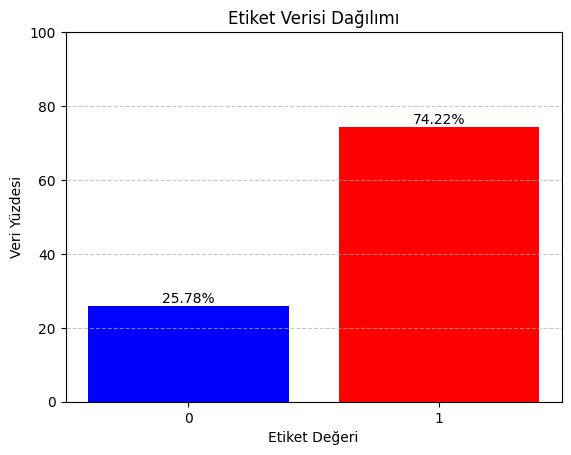

In [22]:
# labels dizisindeki 0 ve 1'lerin dağılımına bakalım
total_samples = len(labels_0)+len(labels_1)
num_zeros = len(labels_0)
num_ones = len(labels_1)

# Yüzdelik olarak dağılımı hesapla
percentage_zeros = (num_zeros / total_samples) * 100
percentage_ones = (num_ones / total_samples) * 100

# Çubuk grafik oluştur
plt.bar([0, 1], [percentage_zeros, percentage_ones], tick_label=['0', '1'], color=['blue', 'red'])
plt.xlabel('Etiket Değeri')
plt.ylabel('Veri Yüzdesi')
plt.title('Etiket Verisi Dağılımı')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Değerleri çubukların üzerine yaz
for i, value in enumerate([percentage_zeros, percentage_ones]):
    plt.text(i, value + 1, f"{value:.2f}%", ha='center')

plt.show()

# Data Augmentation

In [23]:
# veri setini %80 eğitim ve %20 validasyon verisi olarak split edelim
(X_train, X_test, y_train, y_test) = train_test_split(data, labels,test_size=0.20, stratify=labels, random_state=42)

In [24]:
del data_0

In [25]:
del data_1

In [26]:
del labels_0

In [27]:
del labels_1

In [28]:
del data

In [35]:
# Overfitting'i önlemek ve veri setindeki dengesizliği ele almak için veri artırma uygulayalım
datagen = ImageDataGenerator(
        featurewise_center=False,  # Veri kümesi üzerinde girdi ortalamasını sıfıra ayarlar
        samplewise_center=False,   # Her örneğin ortalamasını sıfıra ayarlar
        featurewise_std_normalization=False,  # Girdileri veri kümesinin standart sapmasına böler
        samplewise_std_normalization=False,   # Her girişi kendi standart sapmasıyla böler
        zca_whitening=False,   # ZCA beyazlatma uygular
        rotation_range = 30,   # Görüntüleri rastgele olarak (derece cinsinden, 0 ile 180 arasında) döndürür
        zoom_range = 0.2,   # Görüntüyü rastgele olarak yakınlaştırır
        width_shift_range=0.1,   # Görüntüleri yatay olarak rastgele kaydırır (toplam genişliğin bir kısmı olarak)
        height_shift_range=0.1,   # Görüntüleri dikey olarak rastgele kaydırır (toplam yüksekliğin bir kısmı olarak)
        horizontal_flip = True,   # Görüntüleri rastgele olarak yatay çevirir
        vertical_flip=False)   # Görüntüleri rastgele olarak dikey çevirmez

In [36]:
datagen.fit(X_train)

# ANN

In [30]:
# Objective fonksiyonunu tanımlama
def objective(trial):
    # Hiperparametre aralıklarını belirleme
    units_dense1 = trial.suggest_int('units_dense1', 64, 512)
    units_dense2 = trial.suggest_int('units_dense2', 64, 512)
    units_dense3 = trial.suggest_int('units_dense3', 64, 512)
    dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
    
    # Modeli oluşturma
    model_ann = Sequential()
    model_ann.add(Input(shape=(224, 224, 3)))  # Giriş katmanı
    model_ann.add(Flatten())  # Düzleştirme katmanı
    model_ann.add(Dense(units_dense1, activation='relu'))  # Gizli katman
    model_ann.add(Dense(units_dense2, activation='relu'))  # Gizli katman
    model_ann.add(Dense(units_dense3, activation='relu'))  # Gizli katman
    model_ann.add(Dropout(dropout_rate)) # Dropout katmanı ekleme
    model_ann.add(Dense(1, activation='sigmoid'))  # Çıkış katmanı
    
    # Modeli derleme
    model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Modeli eğitme
    model_ann.fit(X_train,y_train, batch_size = 32, epochs=20, validation_data=(X_test, y_test))
    
    # Modeli değerlendirme
    accuracy = model_ann.evaluate(X_test, y_test, verbose=0)[1]
    
    return accuracy

In [31]:
# Optimize ediciyi başlatma
study_ann = optuna.create_study(direction='maximize')
study_ann.optimize(objective, n_trials=10)

[I 2024-05-24 22:17:14,412] A new study created in memory with name: no-name-19e0fe55-c307-4af4-8522-cd6c065bd209


C:\Users\cuneyt.bayrak\AppData\Local\Temp\ipykernel_126580\1389540013.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)



Epoch 1/20


131/131 [==============================] - 43s 326ms/step - loss: 2.0092 - accuracy: 0.8041 - val_loss: 0.6963 - val_accuracy: 0.8138
Epoch 2/20
131/131 [==============================] - 42s 321ms/step - loss: 0.2445 - accuracy: 0.9137 - val_loss: 0.1311 - val_accuracy: 0.9522
Epoch 3/20
131/131 [==============================] - 44s 337ms/step - loss: 0.8776 - accuracy: 0.8366 - val_loss: 0.2020 - val_accuracy: 0.9341
Epoch 4/20
131/131 [==============================] - 43s 329ms/step - loss: 0.2028 - accuracy: 0.9243 - val_loss: 0.1304 - val_accuracy: 0.9513
Epoch 5/20
131/131 [==============================] - 42s 323ms/step - loss: 0.1609 - accuracy: 0.9410 - val_loss: 0.1315 - val_accuracy: 0.9446
Epoch 6/20
131/131 [==============================] - 44s 339ms/step - loss: 0.1380 - accuracy: 0.9501 - val_loss: 0.1317 - val_accuracy: 0.9456
Epoch 7/20
131/131 [==============================] - 44s 337ms/step - loss: 0.1388 - accuracy: 0.9477 - val_loss: 0.1171 - val

[I 2024-05-24 22:31:56,647] Trial 0 finished with value: 0.9436485171318054 and parameters: {'units_dense1': 362, 'units_dense2': 100, 'units_dense3': 348, 'dropout_rate': 0.027870675581209536, 'learning_rate': 0.0003685353111581623}. Best is trial 0 with value: 0.9436485171318054.


Epoch 1/20
131/131 [==============================] - 27s 200ms/step - loss: 2.2906 - accuracy: 0.8091 - val_loss: 0.1988 - val_accuracy: 0.9322
Epoch 2/20
131/131 [==============================] - 26s 196ms/step - loss: 0.2661 - accuracy: 0.9047 - val_loss: 0.1949 - val_accuracy: 0.9140
Epoch 3/20
131/131 [==============================] - 26s 196ms/step - loss: 0.1615 - accuracy: 0.9352 - val_loss: 0.1181 - val_accuracy: 0.9589
Epoch 4/20
131/131 [==============================] - 26s 196ms/step - loss: 0.1656 - accuracy: 0.9336 - val_loss: 0.2550 - val_accuracy: 0.8682
Epoch 5/20
131/131 [==============================] - 26s 195ms/step - loss: 0.1884 - accuracy: 0.9317 - val_loss: 0.2062 - val_accuracy: 0.9293
Epoch 6/20
131/131 [==============================] - 26s 197ms/step - loss: 0.1424 - accuracy: 0.9460 - val_loss: 0.1682 - val_accuracy: 0.9217
Epoch 7/20
131/131 [==============================] - 26s 196ms/step - loss: 0.1405 - accuracy: 0.9376 - val_loss: 0.1160 - val_ac

[I 2024-05-24 22:40:56,895] Trial 1 finished with value: 0.9512894153594971 and parameters: {'units_dense1': 202, 'units_dense2': 488, 'units_dense3': 496, 'dropout_rate': 0.19429430423217198, 'learning_rate': 2.8565414142850962e-05}. Best is trial 1 with value: 0.9512894153594971.


Epoch 1/20
131/131 [==============================] - 37s 274ms/step - loss: 2.9878 - accuracy: 0.7895 - val_loss: 0.4565 - val_accuracy: 0.7880
Epoch 2/20
131/131 [==============================] - 35s 268ms/step - loss: 0.3095 - accuracy: 0.8657 - val_loss: 0.2279 - val_accuracy: 0.9475
Epoch 3/20
131/131 [==============================] - 34s 260ms/step - loss: 0.2230 - accuracy: 0.9204 - val_loss: 0.2231 - val_accuracy: 0.9236
Epoch 4/20
131/131 [==============================] - 34s 262ms/step - loss: 0.2270 - accuracy: 0.9176 - val_loss: 0.1500 - val_accuracy: 0.9542
Epoch 5/20
131/131 [==============================] - 32s 244ms/step - loss: 0.2674 - accuracy: 0.8944 - val_loss: 0.1892 - val_accuracy: 0.9341
Epoch 6/20
131/131 [==============================] - 33s 252ms/step - loss: 0.1903 - accuracy: 0.9252 - val_loss: 0.1934 - val_accuracy: 0.9341
Epoch 7/20
131/131 [==============================] - 33s 254ms/step - loss: 0.1615 - accuracy: 0.9448 - val_loss: 0.2576 - val_ac

[I 2024-05-24 22:52:20,031] Trial 2 finished with value: 0.9551098346710205 and parameters: {'units_dense1': 274, 'units_dense2': 118, 'units_dense3': 445, 'dropout_rate': 0.23170185862807707, 'learning_rate': 0.0031044192552251645}. Best is trial 2 with value: 0.9551098346710205.


Epoch 1/20
131/131 [==============================] - 42s 310ms/step - loss: 4.5651 - accuracy: 0.7816 - val_loss: 0.2381 - val_accuracy: 0.9217
Epoch 2/20
131/131 [==============================] - 40s 303ms/step - loss: 0.2956 - accuracy: 0.8927 - val_loss: 0.1728 - val_accuracy: 0.9351
Epoch 3/20
131/131 [==============================] - 40s 303ms/step - loss: 0.2011 - accuracy: 0.9259 - val_loss: 0.2746 - val_accuracy: 0.8777
Epoch 4/20
131/131 [==============================] - 41s 311ms/step - loss: 0.1838 - accuracy: 0.9276 - val_loss: 0.1548 - val_accuracy: 0.9503
Epoch 5/20
131/131 [==============================] - 41s 311ms/step - loss: 0.1559 - accuracy: 0.9412 - val_loss: 0.1242 - val_accuracy: 0.9589
Epoch 6/20
131/131 [==============================] - 40s 306ms/step - loss: 0.1585 - accuracy: 0.9434 - val_loss: 0.1547 - val_accuracy: 0.9351
Epoch 7/20
131/131 [==============================] - 41s 310ms/step - loss: 0.1483 - accuracy: 0.9491 - val_loss: 0.1313 - val_ac

[I 2024-05-24 23:05:53,042] Trial 3 finished with value: 0.9560649394989014 and parameters: {'units_dense1': 326, 'units_dense2': 361, 'units_dense3': 222, 'dropout_rate': 0.2561355404200695, 'learning_rate': 0.00045944586620637556}. Best is trial 3 with value: 0.9560649394989014.


Epoch 1/20
131/131 [==============================] - 26s 190ms/step - loss: 2.6729 - accuracy: 0.7840 - val_loss: 0.1603 - val_accuracy: 0.9436
Epoch 2/20
131/131 [==============================] - 24s 182ms/step - loss: 0.2334 - accuracy: 0.9204 - val_loss: 0.1295 - val_accuracy: 0.9599
Epoch 3/20
131/131 [==============================] - 24s 184ms/step - loss: 0.2381 - accuracy: 0.8975 - val_loss: 0.1800 - val_accuracy: 0.9322
Epoch 4/20
131/131 [==============================] - 24s 181ms/step - loss: 0.2156 - accuracy: 0.9202 - val_loss: 0.2514 - val_accuracy: 0.9341
Epoch 5/20
131/131 [==============================] - 24s 186ms/step - loss: 0.2361 - accuracy: 0.9192 - val_loss: 0.1582 - val_accuracy: 0.9484
Epoch 6/20
131/131 [==============================] - 24s 183ms/step - loss: 0.3152 - accuracy: 0.8755 - val_loss: 0.3809 - val_accuracy: 0.7851
Epoch 7/20
131/131 [==============================] - 24s 183ms/step - loss: 0.1969 - accuracy: 0.9295 - val_loss: 0.1296 - val_ac

[I 2024-05-24 23:14:02,455] Trial 4 finished with value: 0.9474689364433289 and parameters: {'units_dense1': 189, 'units_dense2': 199, 'units_dense3': 273, 'dropout_rate': 0.4046769812206615, 'learning_rate': 0.002098957268224713}. Best is trial 3 with value: 0.9560649394989014.


Epoch 1/20
131/131 [==============================] - 16s 115ms/step - loss: 1.9800 - accuracy: 0.7828 - val_loss: 0.2593 - val_accuracy: 0.9207
Epoch 2/20
131/131 [==============================] - 14s 103ms/step - loss: 0.3301 - accuracy: 0.8652 - val_loss: 0.4273 - val_accuracy: 0.7431
Epoch 3/20
131/131 [==============================] - 14s 107ms/step - loss: 0.2564 - accuracy: 0.9166 - val_loss: 0.1765 - val_accuracy: 0.9408
Epoch 4/20
131/131 [==============================] - 14s 109ms/step - loss: 0.2614 - accuracy: 0.9044 - val_loss: 0.3991 - val_accuracy: 0.8252
Epoch 5/20
131/131 [==============================] - 14s 106ms/step - loss: 0.2059 - accuracy: 0.9235 - val_loss: 0.1680 - val_accuracy: 0.9494
Epoch 6/20
131/131 [==============================] - 14s 105ms/step - loss: 0.2757 - accuracy: 0.9006 - val_loss: 0.2341 - val_accuracy: 0.9198
Epoch 7/20
131/131 [==============================] - 14s 106ms/step - loss: 0.2472 - accuracy: 0.9078 - val_loss: 0.1996 - val_ac

[I 2024-05-24 23:18:47,127] Trial 5 finished with value: 0.9149952530860901 and parameters: {'units_dense1': 109, 'units_dense2': 224, 'units_dense3': 128, 'dropout_rate': 0.20774915986630516, 'learning_rate': 0.0019753790222311295}. Best is trial 3 with value: 0.9560649394989014.


Epoch 1/20
131/131 [==============================] - 29s 213ms/step - loss: 2.1519 - accuracy: 0.8186 - val_loss: 0.1607 - val_accuracy: 0.9370
Epoch 2/20
131/131 [==============================] - 26s 195ms/step - loss: 0.2547 - accuracy: 0.8973 - val_loss: 0.1663 - val_accuracy: 0.9427
Epoch 3/20
131/131 [==============================] - 25s 189ms/step - loss: 0.1889 - accuracy: 0.9271 - val_loss: 0.1197 - val_accuracy: 0.9551
Epoch 4/20
131/131 [==============================] - 27s 208ms/step - loss: 0.1677 - accuracy: 0.9400 - val_loss: 0.1143 - val_accuracy: 0.9580
Epoch 5/20
131/131 [==============================] - 26s 202ms/step - loss: 0.1633 - accuracy: 0.9372 - val_loss: 0.1159 - val_accuracy: 0.9628
Epoch 6/20
131/131 [==============================] - 26s 201ms/step - loss: 0.1587 - accuracy: 0.9386 - val_loss: 0.1359 - val_accuracy: 0.9570
Epoch 7/20
131/131 [==============================] - 26s 202ms/step - loss: 0.1338 - accuracy: 0.9474 - val_loss: 0.1622 - val_ac

[I 2024-05-24 23:27:42,318] Trial 6 finished with value: 0.9579751491546631 and parameters: {'units_dense1': 219, 'units_dense2': 297, 'units_dense3': 265, 'dropout_rate': 0.28421678026919117, 'learning_rate': 7.833080643877785e-05}. Best is trial 6 with value: 0.9579751491546631.


Epoch 1/20
131/131 [==============================] - 60s 450ms/step - loss: 2.7470 - accuracy: 0.8096 - val_loss: 0.2868 - val_accuracy: 0.9035
Epoch 2/20
131/131 [==============================] - 59s 449ms/step - loss: 0.3424 - accuracy: 0.8946 - val_loss: 0.5030 - val_accuracy: 0.8701
Epoch 3/20
131/131 [==============================] - 58s 446ms/step - loss: 0.2448 - accuracy: 0.9154 - val_loss: 0.1945 - val_accuracy: 0.9188
Epoch 4/20
131/131 [==============================] - 59s 452ms/step - loss: 0.1721 - accuracy: 0.9367 - val_loss: 0.1491 - val_accuracy: 0.9446
Epoch 5/20
131/131 [==============================] - 59s 451ms/step - loss: 0.2244 - accuracy: 0.9168 - val_loss: 0.3736 - val_accuracy: 0.8567
Epoch 6/20
131/131 [==============================] - 60s 456ms/step - loss: 0.2671 - accuracy: 0.9123 - val_loss: 0.1270 - val_accuracy: 0.9503
Epoch 7/20
131/131 [==============================] - 60s 457ms/step - loss: 0.1524 - accuracy: 0.9431 - val_loss: 0.1223 - val_ac

[I 2024-05-24 23:47:27,021] Trial 7 finished with value: 0.946513831615448 and parameters: {'units_dense1': 490, 'units_dense2': 256, 'units_dense3': 391, 'dropout_rate': 0.08660539407019224, 'learning_rate': 0.001109029998783061}. Best is trial 6 with value: 0.9579751491546631.


Epoch 1/20
131/131 [==============================] - 57s 430ms/step - loss: 3.7292 - accuracy: 0.7998 - val_loss: 0.2698 - val_accuracy: 0.9121
Epoch 2/20
131/131 [==============================] - 55s 423ms/step - loss: 0.2812 - accuracy: 0.9013 - val_loss: 0.1423 - val_accuracy: 0.9475
Epoch 3/20
131/131 [==============================] - 56s 424ms/step - loss: 0.2515 - accuracy: 0.9059 - val_loss: 0.2869 - val_accuracy: 0.9389
Epoch 4/20
131/131 [==============================] - 56s 424ms/step - loss: 0.2671 - accuracy: 0.9030 - val_loss: 0.1364 - val_accuracy: 0.9484
Epoch 5/20
131/131 [==============================] - 55s 423ms/step - loss: 0.1958 - accuracy: 0.9235 - val_loss: 0.2384 - val_accuracy: 0.8883
Epoch 6/20
131/131 [==============================] - 53s 407ms/step - loss: 0.1429 - accuracy: 0.9427 - val_loss: 0.1266 - val_accuracy: 0.9475
Epoch 7/20
131/131 [==============================] - 55s 424ms/step - loss: 0.1477 - accuracy: 0.9465 - val_loss: 0.1294 - val_ac

[I 2024-05-25 00:05:31,895] Trial 8 finished with value: 0.9675262570381165 and parameters: {'units_dense1': 458, 'units_dense2': 364, 'units_dense3': 466, 'dropout_rate': 0.2011429567172351, 'learning_rate': 0.0002506923033187472}. Best is trial 8 with value: 0.9675262570381165.


Epoch 1/20
131/131 [==============================] - 37s 279ms/step - loss: 2.6453 - accuracy: 0.7398 - val_loss: 0.4246 - val_accuracy: 0.8061
Epoch 2/20
131/131 [==============================] - 36s 271ms/step - loss: 0.3819 - accuracy: 0.7950 - val_loss: 0.2165 - val_accuracy: 0.9112
Epoch 3/20
131/131 [==============================] - 36s 273ms/step - loss: 0.3340 - accuracy: 0.8091 - val_loss: 0.2631 - val_accuracy: 0.9274
Epoch 4/20
131/131 [==============================] - 36s 271ms/step - loss: 0.3554 - accuracy: 0.8755 - val_loss: 0.4497 - val_accuracy: 0.7822
Epoch 5/20
131/131 [==============================] - 36s 276ms/step - loss: 0.2977 - accuracy: 0.8760 - val_loss: 0.1612 - val_accuracy: 0.9503
Epoch 6/20
131/131 [==============================] - 37s 279ms/step - loss: 0.2174 - accuracy: 0.8958 - val_loss: 0.1267 - val_accuracy: 0.9475
Epoch 7/20
131/131 [==============================] - 36s 279ms/step - loss: 0.2114 - accuracy: 0.9018 - val_loss: 0.2351 - val_ac

[I 2024-05-25 00:17:38,130] Trial 9 finished with value: 0.9608405232429504 and parameters: {'units_dense1': 314, 'units_dense2': 494, 'units_dense3': 89, 'dropout_rate': 0.24530673814949722, 'learning_rate': 0.0007784840611630115}. Best is trial 8 with value: 0.9675262570381165.


In [32]:
# En iyi hiperparametreleri yazdırma
print('Best hyperparameters: ', study_ann.best_params)

Best hyperparameters:  {'units_dense1': 458, 'units_dense2': 364, 'units_dense3': 466, 'dropout_rate': 0.2011429567172351, 'learning_rate': 0.0002506923033187472}


In [36]:
# Yapay sinir ağı modelini oluşturma
model_ann = Sequential()
model_ann.add(Input(shape=(224, 224,3)))  # Giriş katmanı
model_ann.add(Flatten())  # Düzleştirme katmanı
model_ann.add(Dense(458, activation='relu'))  # Gizli katman
model_ann.add(Dense(364, activation='relu'))  # Gizli katman
model_ann.add(Dense(466, activation='relu'))  # Gizli katman
model_ann.add(Dropout(0.2011429567172351)) # Dropout katmanı ekleme
model_ann.add(Dense(1, activation='sigmoid'))  # Çıkış katmanı

In [37]:
model_ann.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 150528)            0         
                                                                 
 dense_44 (Dense)            (None, 458)               68942282  
                                                                 
 dense_45 (Dense)            (None, 364)               167076    
                                                                 
 dense_46 (Dense)            (None, 466)               170090    
                                                                 
 dropout_11 (Dropout)        (None, 466)               0         
                                                                 
 dense_47 (Dense)            (None, 1)                 467       
                                                                 
Total params: 69279915 (264.28 MB)
Trainable params: 

In [38]:
# Adam optimize edici oluşturma ve öğrenme oranı belirleme
optimizer = Adam(learning_rate=0.0002506923033187472)

In [39]:
# Modeli derleme
model_ann.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
# Modeli eğitme
history_ann=model_ann.fit(X_train,y_train, batch_size = 32, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
131/131 [==============================] - 55s 417ms/step - loss: 1.2571 - accuracy: 0.7759 - val_loss: 0.2130 - val_accuracy: 0.9179
Epoch 2/20
131/131 [==============================] - 55s 420ms/step - loss: 0.2396 - accuracy: 0.9051 - val_loss: 0.1960 - val_accuracy: 0.9188
Epoch 3/20
131/131 [==============================] - 56s 425ms/step - loss: 0.1765 - accuracy: 0.9314 - val_loss: 0.2045 - val_accuracy: 0.9245
Epoch 4/20
131/131 [==============================] - 55s 422ms/step - loss: 0.1995 - accuracy: 0.9243 - val_loss: 0.1260 - val_accuracy: 0.9599
Epoch 5/20
131/131 [==============================] - 55s 416ms/step - loss: 0.1911 - accuracy: 0.9228 - val_loss: 0.1402 - val_accuracy: 0.9494
Epoch 6/20
131/131 [==============================] - 53s 406ms/step - loss: 0.1557 - accuracy: 0.9448 - val_loss: 0.1412 - val_accuracy: 0.9408
Epoch 7/20
131/131 [==============================] - 51s 386ms/step - loss: 0.1779 - accuracy: 0.9302 - val_loss: 0.1487 - val_ac

In [41]:
# Eğitim sürecindeki kayıp değerlerini alın
train_loss_ann = history_ann.history['loss']
val_loss_ann = history_ann.history['val_loss']

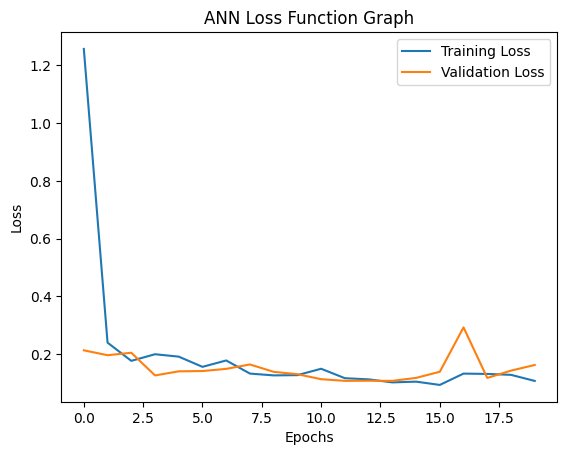

In [42]:
# Kayıp değerlerini çizdirme
plt.plot(train_loss_ann, label='Training Loss')
plt.plot(val_loss_ann, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('ANN Loss Function Graph')
plt.show()

In [43]:
# Test veri kümesi üzerinde tahmin yapma
y_pred_prob_ann = model_ann.predict(X_test)
y_pred_ann = np.round(y_pred_prob_ann).astype(int)

33/33 [==============================] - 1s 22ms/step


In [44]:
# Sınıflandırma raporunu oluşturma
print('ANN Ağı Sınıflandırma Raporu')
print(classification_report(y_test, y_pred_ann))

ANN Ağı Sınıflandırma Raporu
              precision    recall  f1-score   support

           0       0.78      0.98      0.87       270
           1       0.99      0.90      0.95       777

    accuracy                           0.92      1047
   macro avg       0.89      0.94      0.91      1047
weighted avg       0.94      0.92      0.93      1047



In [45]:
# Confusion matrix'i hesapla
cm_ann = confusion_matrix(y_test, y_pred_ann)

In [46]:
# Etiketlerin adlarını belirle
cm_labels = ['NORMAL', 'PNEUMONIA']

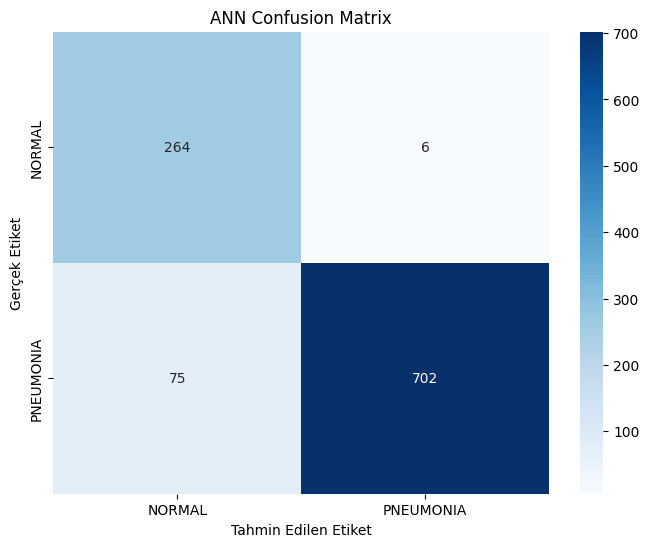

In [47]:
# Heatmap çizimi
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ann, annot=True, fmt="d", cmap="Blues", xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('ANN Confusion Matrix')
plt.show()

In [48]:
# ROC eğrisi oluşturma
fpr_ann, tpr_ann, thresholds_ann = roc_curve(y_test, y_pred_prob_ann)
roc_auc_ann = auc(fpr_ann, tpr_ann)

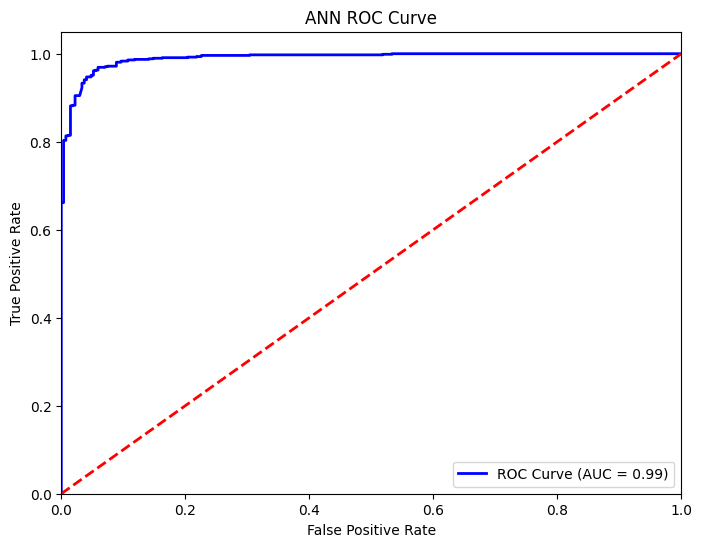

In [49]:
# ROC eğrisini çizme
plt.figure(figsize=(8, 6))
plt.plot(fpr_ann, tpr_ann, color='blue', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc_ann)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [50]:
# daha önce hiç görmediği veri kümesi üzerinde tahmin yapma
y_pred_prob_test_ann = model_ann.predict(data_test)
y_pred_test_ann = np.round(y_pred_prob_test_ann).astype(int)

20/20 [==============================] - 0s 23ms/step


In [51]:
# Sınıflandırma raporunu oluşturma
print('ANN Ağı Sınıflandırma Raporu (Test)')
print(classification_report(labels_test, y_pred_test_ann))

ANN Ağı Sınıflandırma Raporu (Test)
              precision    recall  f1-score   support

           0       0.89      0.57      0.69       234
           1       0.79      0.96      0.86       390

    accuracy                           0.81       624
   macro avg       0.84      0.76      0.78       624
weighted avg       0.82      0.81      0.80       624



In [52]:
# Confusion matrix'i hesapla
cm_test_ann = confusion_matrix(labels_test, y_pred_test_ann)

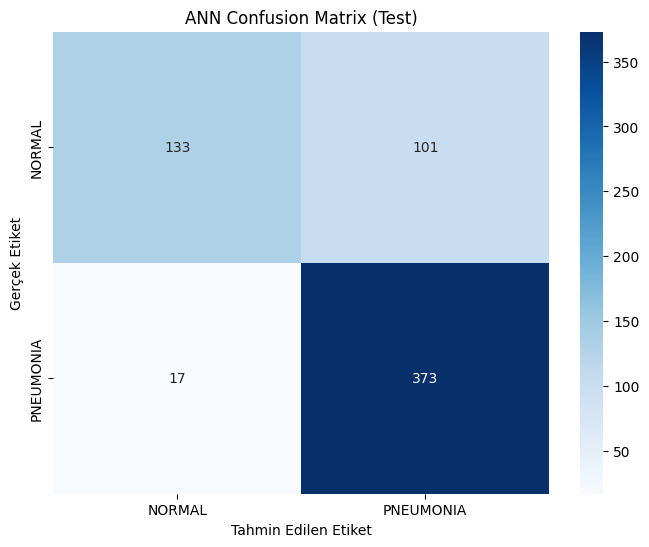

In [53]:
# Heatmap çizimi
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_ann, annot=True, fmt="d", cmap="Blues", xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('ANN Confusion Matrix (Test)')
plt.show()

In [54]:
# ROC eğrisi oluşturma
fpr_test_ann, tpr_test_ann, thresholds_test_ann = roc_curve(labels_test, y_pred_prob_test_ann)
roc_auc_test_ann = auc(fpr_test_ann, tpr_test_ann)

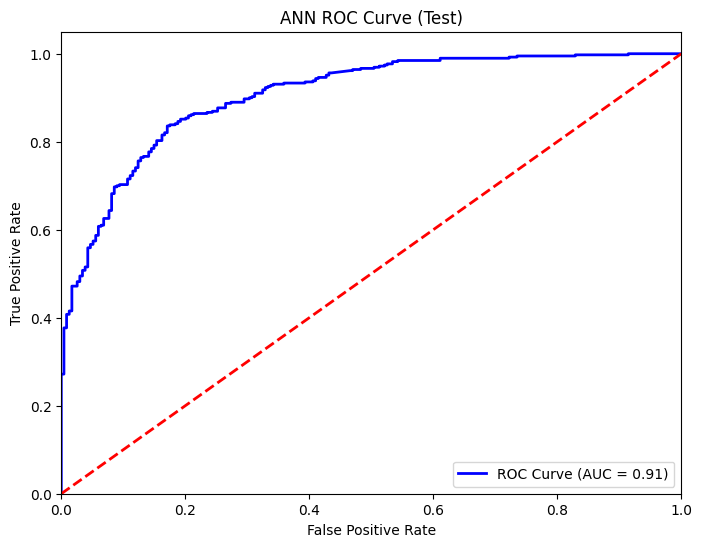

In [55]:
# ROC eğrisini çizme
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_ann, tpr_test_ann, color='blue', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc_test_ann)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN ROC Curve (Test)')
plt.legend(loc="lower right")
plt.show()

# CNN

In [65]:
# Hiperparametre optimizasyon fonksiyonu
def objective(trial):
    model_cnn = Sequential()
    model_cnn.add(Conv2D(trial.suggest_int('conv1_filters', 32, 128), (3, 3), strides=1, padding='same', activation='relu', input_shape=(224, 224, 3)))
    model_cnn.add(BatchNormalization())
    model_cnn.add(MaxPool2D((2, 2), strides=2, padding='same'))

    model_cnn.add(Conv2D(trial.suggest_int('conv2_filters', 64, 256), (3, 3), strides=1, padding='same', activation='relu'))
    model_cnn.add(Dropout(trial.suggest_float('dropout1', 0.1, 0.5)))
    model_cnn.add(BatchNormalization())
    model_cnn.add(MaxPool2D((2, 2), strides=2, padding='same'))

    model_cnn.add(Conv2D(trial.suggest_int('conv3_filters', 64, 256), (3, 3), strides=1, padding='same', activation='relu'))
    model_cnn.add(BatchNormalization())
    model_cnn.add(MaxPool2D((2, 2), strides=2, padding='same'))

    model_cnn.add(Conv2D(trial.suggest_int('conv4_filters', 128, 512), (3, 3), strides=1, padding='same', activation='relu'))
    model_cnn.add(Dropout(trial.suggest_float('dropout2', 0.1, 0.5)))
    model_cnn.add(BatchNormalization())
    model_cnn.add(MaxPool2D((2, 2), strides=2, padding='same'))

    model_cnn.add(Conv2D(trial.suggest_int('conv5_filters', 256, 512), (3, 3), strides=1, padding='same', activation='relu'))
    model_cnn.add(Dropout(trial.suggest_float('dropout3', 0.1, 0.5)))
    model_cnn.add(BatchNormalization())
    model_cnn.add(MaxPool2D((2, 2), strides=2, padding='same'))

    model_cnn.add(Flatten())
    model_cnn.add(Dense(units=trial.suggest_int('dense_units', 64, 256), activation='relu'))
    model_cnn.add(Dropout(trial.suggest_float('dropout4', 0.1, 0.5)))
    model_cnn.add(Dense(units=1, activation='sigmoid'))

    model_cnn.compile(optimizer=Adam(learning_rate=trial.suggest_float('learning_rate', 1e-5, 1e-3)), loss='binary_crossentropy', metrics=['accuracy'])

    history = model_cnn.fit(X_train, y_train, batch_size=32,epochs=20, validation_data=(X_test, y_test))

    val_accuracy = max(history.history['val_accuracy'])

    return val_accuracy


In [66]:
study_cnn = optuna.create_study(direction='maximize')
study_cnn.optimize(objective, n_trials=10)

[I 2024-05-26 10:42:13,505] A new study created in memory with name: no-name-6b83d986-f235-4c30-9aca-cb8cec9548cb


Epoch 1/20
131/131 [==============================] - 504s 4s/step - loss: 0.3837 - accuracy: 0.8922 - val_loss: 10.2233 - val_accuracy: 0.7421
Epoch 2/20
131/131 [==============================] - 504s 4s/step - loss: 0.1367 - accuracy: 0.9479 - val_loss: 10.2418 - val_accuracy: 0.7421
Epoch 3/20
131/131 [==============================] - 500s 4s/step - loss: 0.1154 - accuracy: 0.9587 - val_loss: 7.7909 - val_accuracy: 0.7421
Epoch 4/20
131/131 [==============================] - 503s 4s/step - loss: 0.0799 - accuracy: 0.9699 - val_loss: 1.6828 - val_accuracy: 0.7058
Epoch 5/20
131/131 [==============================] - 502s 4s/step - loss: 0.0824 - accuracy: 0.9713 - val_loss: 0.2674 - val_accuracy: 0.9226
Epoch 6/20
131/131 [==============================] - 506s 4s/step - loss: 0.0663 - accuracy: 0.9773 - val_loss: 0.0699 - val_accuracy: 0.9761
Epoch 7/20
131/131 [==============================] - 518s 4s/step - loss: 0.0604 - accuracy: 0.9778 - val_loss: 0.0809 - val_accuracy: 0.96

[I 2024-05-26 13:29:56,732] Trial 0 finished with value: 0.9789875745773315 and parameters: {'conv1_filters': 106, 'conv2_filters': 148, 'dropout1': 0.2259501795953779, 'conv3_filters': 211, 'conv4_filters': 233, 'dropout2': 0.20948757511624894, 'conv5_filters': 268, 'dropout3': 0.2242530706610941, 'dense_units': 132, 'dropout4': 0.3235732143815917, 'learning_rate': 0.0009628413450846403}. Best is trial 0 with value: 0.9789875745773315.


Epoch 1/20
131/131 [==============================] - 533s 4s/step - loss: 0.2766 - accuracy: 0.9274 - val_loss: 3.1496 - val_accuracy: 0.7421
Epoch 2/20
131/131 [==============================] - 527s 4s/step - loss: 0.0895 - accuracy: 0.9644 - val_loss: 3.6739 - val_accuracy: 0.7421
Epoch 3/20
131/131 [==============================] - 525s 4s/step - loss: 0.0741 - accuracy: 0.9723 - val_loss: 3.6224 - val_accuracy: 0.7421
Epoch 4/20
131/131 [==============================] - 527s 4s/step - loss: 0.0630 - accuracy: 0.9751 - val_loss: 2.0419 - val_accuracy: 0.7421
Epoch 5/20
131/131 [==============================] - 531s 4s/step - loss: 0.0505 - accuracy: 0.9806 - val_loss: 0.3576 - val_accuracy: 0.8491
Epoch 6/20
131/131 [==============================] - 529s 4s/step - loss: 0.0542 - accuracy: 0.9790 - val_loss: 0.0861 - val_accuracy: 0.9742
Epoch 7/20
131/131 [==============================] - 528s 4s/step - loss: 0.0435 - accuracy: 0.9842 - val_loss: 0.0708 - val_accuracy: 0.9742

[I 2024-05-26 16:26:58,777] Trial 1 finished with value: 0.9866284728050232 and parameters: {'conv1_filters': 88, 'conv2_filters': 207, 'dropout1': 0.29219608178656925, 'conv3_filters': 223, 'conv4_filters': 147, 'dropout2': 0.4695501450867393, 'conv5_filters': 474, 'dropout3': 0.3597984737723563, 'dense_units': 241, 'dropout4': 0.1811425934101134, 'learning_rate': 0.00011440677212069482}. Best is trial 1 with value: 0.9866284728050232.


Epoch 1/20
131/131 [==============================] - 513s 4s/step - loss: 0.4271 - accuracy: 0.9001 - val_loss: 18.9434 - val_accuracy: 0.7421
Epoch 2/20
131/131 [==============================] - 509s 4s/step - loss: 0.1282 - accuracy: 0.9529 - val_loss: 20.2553 - val_accuracy: 0.7421
Epoch 3/20
131/131 [==============================] - 514s 4s/step - loss: 0.1107 - accuracy: 0.9577 - val_loss: 2.5078 - val_accuracy: 0.7412
Epoch 4/20
131/131 [==============================] - 509s 4s/step - loss: 0.0980 - accuracy: 0.9642 - val_loss: 7.5697 - val_accuracy: 0.7421
Epoch 5/20
131/131 [==============================] - 507s 4s/step - loss: 0.0803 - accuracy: 0.9701 - val_loss: 0.1635 - val_accuracy: 0.9637
Epoch 6/20
131/131 [==============================] - 506s 4s/step - loss: 0.0719 - accuracy: 0.9761 - val_loss: 0.2574 - val_accuracy: 0.9102
Epoch 7/20
131/131 [==============================] - 503s 4s/step - loss: 0.0810 - accuracy: 0.9723 - val_loss: 2.1063 - val_accuracy: 0.74

[I 2024-05-26 19:15:57,319] Trial 2 finished with value: 0.9837631583213806 and parameters: {'conv1_filters': 116, 'conv2_filters': 106, 'dropout1': 0.21237134521515497, 'conv3_filters': 240, 'conv4_filters': 385, 'dropout2': 0.29230994224927964, 'conv5_filters': 420, 'dropout3': 0.4259157096837739, 'dense_units': 109, 'dropout4': 0.3766431669604403, 'learning_rate': 0.0009763916170459133}. Best is trial 1 with value: 0.9866284728050232.


Epoch 1/20
131/131 [==============================] - 496s 4s/step - loss: 0.4091 - accuracy: 0.9118 - val_loss: 10.4990 - val_accuracy: 0.7421
Epoch 2/20
131/131 [==============================] - 488s 4s/step - loss: 0.1234 - accuracy: 0.9560 - val_loss: 10.2759 - val_accuracy: 0.7421
Epoch 3/20
131/131 [==============================] - 501s 4s/step - loss: 0.1084 - accuracy: 0.9560 - val_loss: 8.1820 - val_accuracy: 0.7421
Epoch 4/20
131/131 [==============================] - 493s 4s/step - loss: 0.0913 - accuracy: 0.9639 - val_loss: 4.0261 - val_accuracy: 0.7421
Epoch 5/20
131/131 [==============================] - 489s 4s/step - loss: 0.0656 - accuracy: 0.9711 - val_loss: 0.2331 - val_accuracy: 0.9160
Epoch 6/20
131/131 [==============================] - 492s 4s/step - loss: 0.0803 - accuracy: 0.9699 - val_loss: 3.8539 - val_accuracy: 0.5673
Epoch 7/20
131/131 [==============================] - 491s 4s/step - loss: 0.0658 - accuracy: 0.9735 - val_loss: 0.0652 - val_accuracy: 0.97

[I 2024-05-26 22:00:05,558] Trial 3 finished with value: 0.9780324697494507 and parameters: {'conv1_filters': 121, 'conv2_filters': 128, 'dropout1': 0.10175622294580614, 'conv3_filters': 129, 'conv4_filters': 337, 'dropout2': 0.48371642782672364, 'conv5_filters': 341, 'dropout3': 0.4213141156181154, 'dense_units': 125, 'dropout4': 0.35643758195570785, 'learning_rate': 0.00079769021292159}. Best is trial 1 with value: 0.9866284728050232.


Epoch 1/20
131/131 [==============================] - 393s 3s/step - loss: 0.3845 - accuracy: 0.8941 - val_loss: 6.1330 - val_accuracy: 0.7421
Epoch 2/20
131/131 [==============================] - 388s 3s/step - loss: 0.1607 - accuracy: 0.9501 - val_loss: 3.1375 - val_accuracy: 0.7421
Epoch 3/20
131/131 [==============================] - 387s 3s/step - loss: 0.1462 - accuracy: 0.9577 - val_loss: 4.7794 - val_accuracy: 0.7421
Epoch 4/20
131/131 [==============================] - 390s 3s/step - loss: 0.1363 - accuracy: 0.9642 - val_loss: 1.7081 - val_accuracy: 0.7421
Epoch 5/20
131/131 [==============================] - 387s 3s/step - loss: 0.1370 - accuracy: 0.9646 - val_loss: 0.8069 - val_accuracy: 0.8052
Epoch 6/20
131/131 [==============================] - 391s 3s/step - loss: 0.1141 - accuracy: 0.9756 - val_loss: 2.5169 - val_accuracy: 0.7421
Epoch 7/20
131/131 [==============================] - 388s 3s/step - loss: 0.1067 - accuracy: 0.9713 - val_loss: 0.1800 - val_accuracy: 0.9475

[I 2024-05-27 00:08:20,037] Trial 4 finished with value: 0.9808977842330933 and parameters: {'conv1_filters': 77, 'conv2_filters': 124, 'dropout1': 0.4033199066909058, 'conv3_filters': 126, 'conv4_filters': 300, 'dropout2': 0.17275855242639562, 'conv5_filters': 433, 'dropout3': 0.38171753489322247, 'dense_units': 68, 'dropout4': 0.4279150979837192, 'learning_rate': 0.000699297497626151}. Best is trial 1 with value: 0.9866284728050232.


Epoch 1/20
131/131 [==============================] - 685s 5s/step - loss: 0.3963 - accuracy: 0.9137 - val_loss: 3.9754 - val_accuracy: 0.7421
Epoch 2/20
131/131 [==============================] - 682s 5s/step - loss: 0.1356 - accuracy: 0.9520 - val_loss: 8.0234 - val_accuracy: 0.7421
Epoch 3/20
131/131 [==============================] - 694s 5s/step - loss: 0.1015 - accuracy: 0.9618 - val_loss: 6.6670 - val_accuracy: 0.7421
Epoch 4/20
131/131 [==============================] - 685s 5s/step - loss: 0.0912 - accuracy: 0.9670 - val_loss: 3.8756 - val_accuracy: 0.7421
Epoch 5/20
131/131 [==============================] - 683s 5s/step - loss: 0.0897 - accuracy: 0.9694 - val_loss: 3.0940 - val_accuracy: 0.7622
Epoch 6/20
131/131 [==============================] - 681s 5s/step - loss: 0.0645 - accuracy: 0.9766 - val_loss: 3.6586 - val_accuracy: 0.7412
Epoch 7/20
131/131 [==============================] - 680s 5s/step - loss: 0.0529 - accuracy: 0.9802 - val_loss: 2.4108 - val_accuracy: 0.7784

[I 2024-05-27 03:54:57,007] Trial 5 finished with value: 0.9665711522102356 and parameters: {'conv1_filters': 127, 'conv2_filters': 245, 'dropout1': 0.37478228462498797, 'conv3_filters': 182, 'conv4_filters': 442, 'dropout2': 0.14786061727606384, 'conv5_filters': 462, 'dropout3': 0.3646170446824205, 'dense_units': 117, 'dropout4': 0.2937155777213153, 'learning_rate': 0.000964038401002277}. Best is trial 1 with value: 0.9866284728050232.


Epoch 1/20
131/131 [==============================] - 471s 4s/step - loss: 0.3101 - accuracy: 0.9109 - val_loss: 4.8304 - val_accuracy: 0.7421
Epoch 2/20
131/131 [==============================] - 469s 4s/step - loss: 0.1140 - accuracy: 0.9577 - val_loss: 5.2826 - val_accuracy: 0.7421
Epoch 3/20
131/131 [==============================] - 468s 4s/step - loss: 0.0985 - accuracy: 0.9644 - val_loss: 5.2807 - val_accuracy: 0.7421
Epoch 4/20
131/131 [==============================] - 468s 4s/step - loss: 0.0857 - accuracy: 0.9689 - val_loss: 4.9328 - val_accuracy: 0.7421
Epoch 5/20
131/131 [==============================] - 469s 4s/step - loss: 0.0692 - accuracy: 0.9732 - val_loss: 4.3583 - val_accuracy: 0.7421
Epoch 6/20
131/131 [==============================] - 469s 4s/step - loss: 0.0562 - accuracy: 0.9797 - val_loss: 0.3921 - val_accuracy: 0.8338
Epoch 7/20
131/131 [==============================] - 468s 4s/step - loss: 0.0542 - accuracy: 0.9814 - val_loss: 0.1772 - val_accuracy: 0.9408

[I 2024-05-27 06:31:06,875] Trial 6 finished with value: 0.9789875745773315 and parameters: {'conv1_filters': 77, 'conv2_filters': 202, 'dropout1': 0.4281458356045186, 'conv3_filters': 195, 'conv4_filters': 465, 'dropout2': 0.2775865258338828, 'conv5_filters': 259, 'dropout3': 0.47382887153940645, 'dense_units': 152, 'dropout4': 0.4593996434007389, 'learning_rate': 0.0004459280560325579}. Best is trial 1 with value: 0.9866284728050232.


Epoch 1/20
131/131 [==============================] - 355s 3s/step - loss: 0.4219 - accuracy: 0.9114 - val_loss: 13.7242 - val_accuracy: 0.7421
Epoch 2/20
131/131 [==============================] - 347s 3s/step - loss: 0.1084 - accuracy: 0.9618 - val_loss: 16.3579 - val_accuracy: 0.7421
Epoch 3/20
131/131 [==============================] - 346s 3s/step - loss: 0.0959 - accuracy: 0.9649 - val_loss: 4.2471 - val_accuracy: 0.7421
Epoch 4/20
131/131 [==============================] - 349s 3s/step - loss: 0.0721 - accuracy: 0.9732 - val_loss: 7.3658 - val_accuracy: 0.7421
Epoch 5/20
131/131 [==============================] - 354s 3s/step - loss: 0.0727 - accuracy: 0.9759 - val_loss: 2.9772 - val_accuracy: 0.7421
Epoch 6/20
131/131 [==============================] - 347s 3s/step - loss: 0.0615 - accuracy: 0.9754 - val_loss: 1.5985 - val_accuracy: 0.7450
Epoch 7/20
131/131 [==============================] - 345s 3s/step - loss: 0.0587 - accuracy: 0.9795 - val_loss: 0.2073 - val_accuracy: 0.94

[I 2024-05-27 08:27:02,011] Trial 7 finished with value: 0.9713466763496399 and parameters: {'conv1_filters': 99, 'conv2_filters': 80, 'dropout1': 0.3760196132219539, 'conv3_filters': 239, 'conv4_filters': 229, 'dropout2': 0.2943364160219779, 'conv5_filters': 450, 'dropout3': 0.4750107856083221, 'dense_units': 222, 'dropout4': 0.4154631317467834, 'learning_rate': 0.0005545048346509327}. Best is trial 1 with value: 0.9866284728050232.


Epoch 1/20
131/131 [==============================] - 401s 3s/step - loss: 0.4120 - accuracy: 0.9252 - val_loss: 5.6857 - val_accuracy: 0.7421
Epoch 2/20
131/131 [==============================] - 401s 3s/step - loss: 0.0961 - accuracy: 0.9646 - val_loss: 5.0444 - val_accuracy: 0.7421
Epoch 3/20
131/131 [==============================] - 399s 3s/step - loss: 0.0826 - accuracy: 0.9718 - val_loss: 3.9216 - val_accuracy: 0.7421
Epoch 4/20
131/131 [==============================] - 400s 3s/step - loss: 0.0738 - accuracy: 0.9723 - val_loss: 2.9900 - val_accuracy: 0.7421
Epoch 5/20
131/131 [==============================] - 400s 3s/step - loss: 0.0602 - accuracy: 0.9792 - val_loss: 6.1421 - val_accuracy: 0.7421
Epoch 6/20
131/131 [==============================] - 401s 3s/step - loss: 0.0555 - accuracy: 0.9809 - val_loss: 2.9482 - val_accuracy: 0.7459
Epoch 7/20
131/131 [==============================] - 436s 3s/step - loss: 0.0355 - accuracy: 0.9866 - val_loss: 5.9222 - val_accuracy: 0.7431

[I 2024-05-27 10:54:24,462] Trial 8 finished with value: 0.9694364666938782 and parameters: {'conv1_filters': 98, 'conv2_filters': 150, 'dropout1': 0.4590236258327095, 'conv3_filters': 85, 'conv4_filters': 383, 'dropout2': 0.42550449654741695, 'conv5_filters': 454, 'dropout3': 0.22029712950674774, 'dense_units': 150, 'dropout4': 0.20370124832916536, 'learning_rate': 0.000621177833744766}. Best is trial 1 with value: 0.9866284728050232.


Epoch 1/20
131/131 [==============================] - 741s 6s/step - loss: 0.2680 - accuracy: 0.9008 - val_loss: 0.6293 - val_accuracy: 0.7421
Epoch 2/20
131/131 [==============================] - 730s 6s/step - loss: 0.1039 - accuracy: 0.9611 - val_loss: 1.0597 - val_accuracy: 0.7421
Epoch 3/20
131/131 [==============================] - 720s 5s/step - loss: 0.0896 - accuracy: 0.9670 - val_loss: 1.2138 - val_accuracy: 0.7421
Epoch 4/20
131/131 [==============================] - 704s 5s/step - loss: 0.0687 - accuracy: 0.9744 - val_loss: 0.7311 - val_accuracy: 0.7421
Epoch 5/20
131/131 [==============================] - 713s 5s/step - loss: 0.0672 - accuracy: 0.9720 - val_loss: 0.2023 - val_accuracy: 0.9102
Epoch 6/20
131/131 [==============================] - 701s 5s/step - loss: 0.0541 - accuracy: 0.9785 - val_loss: 0.1158 - val_accuracy: 0.9513
Epoch 7/20
131/131 [==============================] - 711s 5s/step - loss: 0.0505 - accuracy: 0.9790 - val_loss: 0.0872 - val_accuracy: 0.9675

[I 2024-05-27 14:49:36,543] Trial 9 finished with value: 0.982807993888855 and parameters: {'conv1_filters': 118, 'conv2_filters': 245, 'dropout1': 0.3193342326191799, 'conv3_filters': 215, 'conv4_filters': 170, 'dropout2': 0.11677409532979666, 'conv5_filters': 418, 'dropout3': 0.49429143476574366, 'dense_units': 144, 'dropout4': 0.267394831818709, 'learning_rate': 2.7140960787615992e-05}. Best is trial 1 with value: 0.9866284728050232.


In [67]:
# En iyi hiperparametreleri yazdırma
print('Best hyperparameters: ', study_cnn.best_params)

Best hyperparameters:  {'conv1_filters': 88, 'conv2_filters': 207, 'dropout1': 0.29219608178656925, 'conv3_filters': 223, 'conv4_filters': 147, 'dropout2': 0.4695501450867393, 'conv5_filters': 474, 'dropout3': 0.3597984737723563, 'dense_units': 241, 'dropout4': 0.1811425934101134, 'learning_rate': 0.00011440677212069482}


In [68]:
# Modeli oluşturun
model_cnn = Sequential()
model_cnn.add(Conv2D(88 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (224,224,3)))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model_cnn.add(Conv2D(207 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model_cnn.add(Dropout(0.29219608178656925))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model_cnn.add(Conv2D(223 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model_cnn.add(Conv2D(147 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model_cnn.add(Dropout(0.4695501450867393))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model_cnn.add(Conv2D(474 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model_cnn.add(Dropout(0.3597984737723563))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model_cnn.add(Flatten())
model_cnn.add(Dense(units = 241 , activation = 'relu'))
model_cnn.add(Dropout(0.1811425934101134))
model_cnn.add(Dense(units = 1 , activation = 'sigmoid'))

In [70]:
learning_rate_cnn =  0.00011440677212069482
optimizer_cnn = Adam(learning_rate=learning_rate_cnn)
model_cnn.compile(optimizer = optimizer_cnn , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [71]:
model_cnn.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 224, 224, 88)      2464      
                                                                 
 batch_normalization_65 (Ba  (None, 224, 224, 88)      352       
 tchNormalization)                                               
                                                                 
 max_pooling2d_65 (MaxPooli  (None, 112, 112, 88)      0         
 ng2D)                                                           
                                                                 
 conv2d_66 (Conv2D)          (None, 112, 112, 207)     164151    
                                                                 
 dropout_64 (Dropout)        (None, 112, 112, 207)     0         
                                                                 
 batch_normalization_66 (Ba  (None, 112, 112, 207)   

In [72]:
# Modeli eğitin
H_cnn=model_cnn.fit(X_train,y_train, batch_size = 32 , epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
131/131 [==============================] - 540s 4s/step - loss: 0.2937 - accuracy: 0.9145 - val_loss: 2.4404 - val_accuracy: 0.7421
Epoch 2/20
131/131 [==============================] - 529s 4s/step - loss: 0.0885 - accuracy: 0.9685 - val_loss: 3.8843 - val_accuracy: 0.7421
Epoch 3/20
131/131 [==============================] - 525s 4s/step - loss: 0.0770 - accuracy: 0.9711 - val_loss: 3.3110 - val_accuracy: 0.7421
Epoch 4/20
131/131 [==============================] - 523s 4s/step - loss: 0.0566 - accuracy: 0.9771 - val_loss: 2.2237 - val_accuracy: 0.7421
Epoch 5/20
131/131 [==============================] - 525s 4s/step - loss: 0.0495 - accuracy: 0.9809 - val_loss: 0.7834 - val_accuracy: 0.7650
Epoch 6/20
131/131 [==============================] - 528s 4s/step - loss: 0.0442 - accuracy: 0.9835 - val_loss: 0.1171 - val_accuracy: 0.9561
Epoch 7/20
131/131 [==============================] - 527s 4s/step - loss: 0.0363 - accuracy: 0.9857 - val_loss: 0.0770 - val_accuracy: 0.9704

In [73]:
# Eğitim sürecindeki kayıp değerlerini alın
train_loss_cnn = H_cnn.history['loss']
val_loss_cnn = H_cnn.history['val_loss']

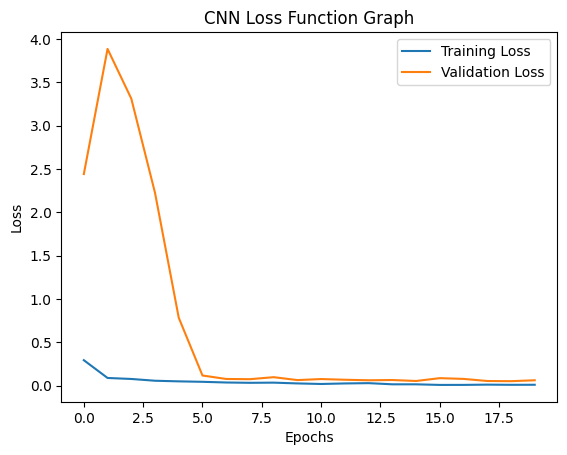

In [74]:
# Kayıp değerlerini çizdirme
plt.plot(train_loss_cnn, label='Training Loss')
plt.plot(val_loss_cnn, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('CNN Loss Function Graph')
plt.show()

In [75]:
# Test veri kümesi üzerinde tahmin yapma
y_pred_prob_cnn = model_cnn.predict(X_test)
y_pred_cnn = np.round(y_pred_prob_cnn).astype(int)

33/33 [==============================] - 26s 772ms/step


In [76]:
# Sınıflandırma raporunu oluşturma
print('CNN Ağı Sınıflandırma Raporu')
print(classification_report(y_test, y_pred_cnn))

CNN Ağı Sınıflandırma Raporu
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       270
           1       0.98      0.99      0.99       777

    accuracy                           0.98      1047
   macro avg       0.97      0.97      0.97      1047
weighted avg       0.98      0.98      0.98      1047



In [77]:
# Confusion matrix'i hesapla
cm_cnn = confusion_matrix(y_test, y_pred_cnn)

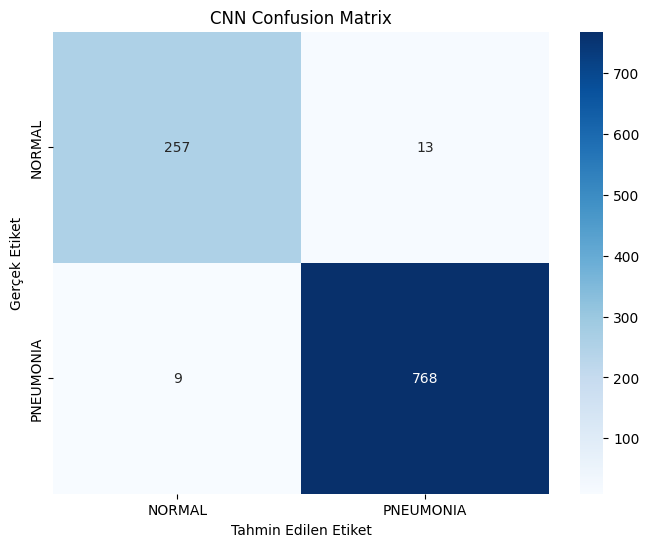

In [78]:
# Heatmap çizimi
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cnn, annot=True, fmt="d", cmap="Blues", xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('CNN Confusion Matrix')
plt.show()

In [79]:
# ROC eğrisi oluşturma
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(y_test, y_pred_prob_cnn)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

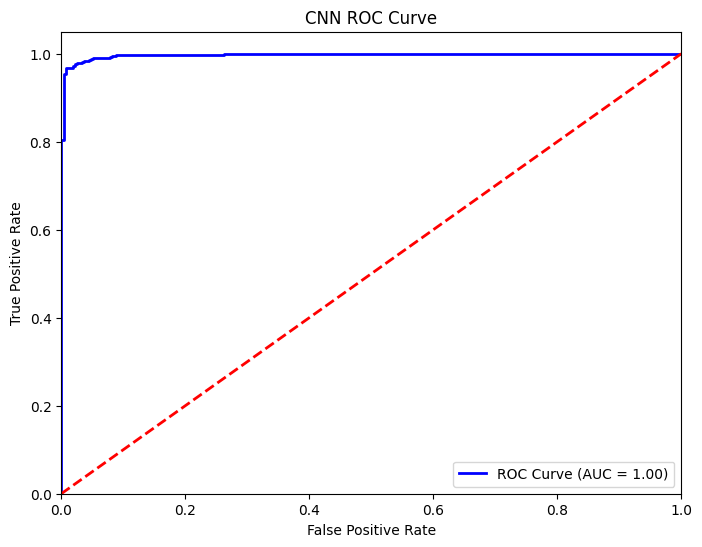

In [80]:
# ROC eğrisini çizme
plt.figure(figsize=(8, 6))
plt.plot(fpr_cnn, tpr_cnn, color='blue', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc_cnn)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CNN ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [81]:
# daha önce hiç görmediği veri kümesi üzerinde tahmin yapma
y_pred_prob_test_cnn = model_cnn.predict(data_test)
y_pred_test_cnn = np.round(y_pred_prob_test_cnn).astype(int)

20/20 [==============================] - 15s 762ms/step


In [82]:
# Sınıflandırma raporunu oluşturma
print('CNN Ağı Sınıflandırma Raporu (Test)')
print(classification_report(labels_test, y_pred_test_cnn))

CNN Ağı Sınıflandırma Raporu (Test)
              precision    recall  f1-score   support

           0       0.96      0.23      0.37       234
           1       0.68      0.99      0.81       390

    accuracy                           0.71       624
   macro avg       0.82      0.61      0.59       624
weighted avg       0.79      0.71      0.64       624



In [83]:
# Confusion matrix'i hesapla
cm_test_cnn = confusion_matrix(labels_test, y_pred_test_cnn)

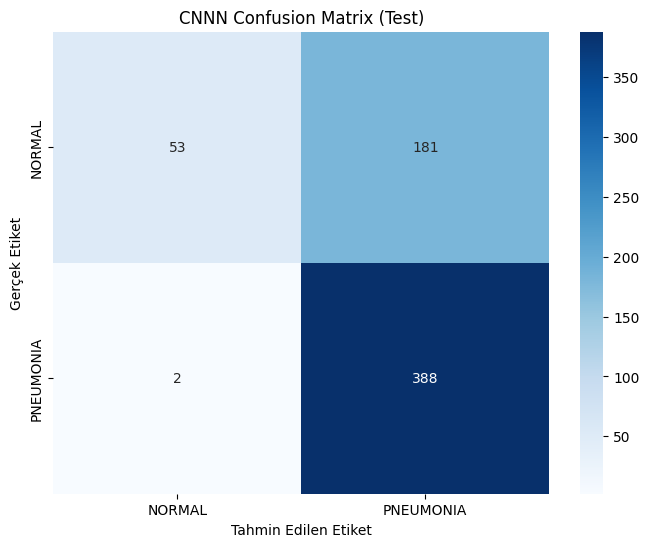

In [84]:
# Heatmap çizimi
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_cnn, annot=True, fmt="d", cmap="Blues", xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('CNNN Confusion Matrix (Test)')
plt.show()

In [85]:
# ROC eğrisi oluşturma
fpr_test_cnn, tpr_test_cnn, thresholds_test_cnn = roc_curve(labels_test, y_pred_prob_test_cnn)
roc_auc_test_cnn = auc(fpr_test_cnn, tpr_test_cnn)

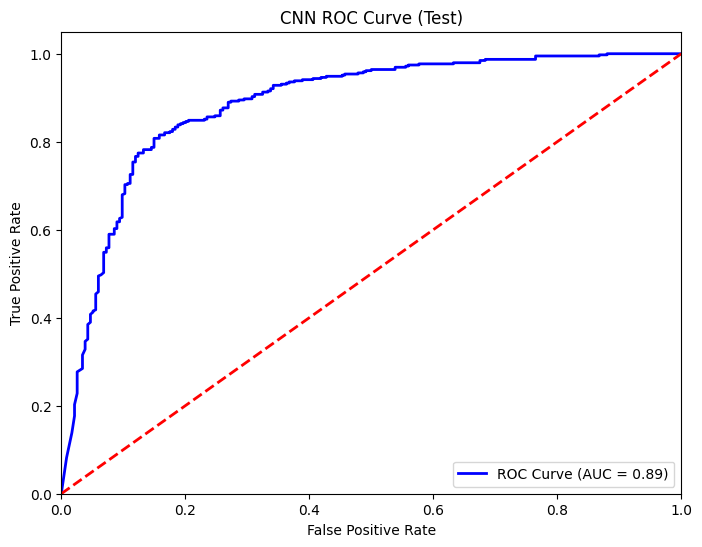

In [86]:
# ROC eğrisini çizme
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_cnn, tpr_test_cnn, color='blue', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc_test_cnn)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CNN ROC Curve (Test)')
plt.legend(loc="lower right")
plt.show()

# VGG16

In [87]:
def objective(trial):
    # Hiperparametrelerin seçimi
    lr = trial.suggest_loguniform('lr', 1e-5, 1e-3)
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.2, 0.5)
    dense_units = trial.suggest_int('dense_units', 32, 128)
    
    # VGG16 tabanlı modelin oluşturulması
    baseModel = VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
    headModel = baseModel.output
    headModel = Flatten(name="flatten")(headModel)
    headModel = Dense(dense_units, activation="relu", name='fc1')(headModel)
    headModel = Dense(dense_units, activation="relu", name='fc2')(headModel)
    headModel = Dropout(dropout_rate)(headModel)
    headModel = Dense(1, activation="sigmoid", name='predictions')(headModel)
    
    model = Model(inputs=baseModel.input, outputs=headModel)
    
    # VGG16 tabanının dondurulması
    for layer in baseModel.layers:
        layer.trainable = False
    
    # Modelin derlenmesi
    opt = Adam(learning_rate=lr)
    model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
    
    # Modelin eğitilmesi
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=0)
    
    # En iyi doğrulama kaybının geri döndürülmesi
    val_loss = min(history.history['val_loss'])
    
    return val_loss


In [88]:
study_vgg16 = optuna.create_study(direction="minimize")
study_vgg16.optimize(objective, n_trials=10)

[I 2024-05-28 01:45:51,441] A new study created in memory with name: no-name-aa544da9-81ec-4f0f-9197-66c335b6aa80
C:\Users\cuneyt.bayrak\AppData\Local\Temp\ipykernel_126580\2699951594.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-3)
C:\Users\cuneyt.bayrak\AppData\Local\Temp\ipykernel_126580\2699951594.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.2, 0.5)
[I 2024-05-28 03:50:14,912] Trial 0 finished with value: 0.03883310407400131 and parameters: {'lr': 0.000176404182381502, 'dropout_rate': 0.4463217858132873, 'dense_units': 63}. Best is trial 0 with value: 0.03883310407400131.


In [89]:
print("En iyi hiperparametreler: ", study_vgg16.best_params)

En iyi hiperparametreler:  {'lr': 9.858704150030282e-05, 'dropout_rate': 0.210937234518135, 'dense_units': 52}


In [90]:
# VGG16 ağını yükleyerek FC katman setlerinin kapalı kalmasını sağlayalım
baseModel = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))

In [91]:
# baseModel üzerine yerleştirilecek classifier modelini oluşturalım
headModel = baseModel.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(52, activation="relu", name='fc1')(headModel)
headModel = Dense(52, activation="relu", name='fc2')(headModel)
headModel = Dropout(0.210937234518135)(headModel)
headModel = Dense(1, activation="sigmoid", name='predictions')(headModel)

In [92]:
# oluşturduğumuz FC classifier katmanını baseModel üzerine yerleştirelim
model = Model(inputs=baseModel.input, outputs=headModel)

In [93]:
# VGG16 modelinin evrişim tabanındaki tüm katmanları donduralım
for layer in baseModel.layers:
    layer.trainable = False

In [94]:
# hiperparametrelerimizi ayarlayalım
lr = 9.858704150030282e-05 
epoch = 20
bs = 32

In [95]:
opt = Adam(learning_rate=lr)

In [96]:
# modeli compile edelim
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

In [97]:
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [100]:
# modelimizi çalıştıralım bakalım neler yapacak
H_VGG16 = model.fit(X_train, y_train, batch_size=bs,
    steps_per_epoch=len(X_train) // bs,
    validation_data=(X_test, y_test),
    validation_steps=len(X_test) // bs,
    epochs=epoch
)

Epoch 1/20
130/130 [==============================] - 365s 3s/step - loss: 0.2040 - accuracy: 0.9190 - val_loss: 0.0839 - val_accuracy: 0.9736
Epoch 2/20
130/130 [==============================] - 361s 3s/step - loss: 0.0885 - accuracy: 0.9675 - val_loss: 0.0607 - val_accuracy: 0.9814
Epoch 3/20
130/130 [==============================] - 365s 3s/step - loss: 0.0670 - accuracy: 0.9776 - val_loss: 0.0774 - val_accuracy: 0.9707
Epoch 4/20
130/130 [==============================] - 364s 3s/step - loss: 0.0571 - accuracy: 0.9805 - val_loss: 0.0619 - val_accuracy: 0.9736
Epoch 5/20
130/130 [==============================] - 365s 3s/step - loss: 0.0480 - accuracy: 0.9822 - val_loss: 0.0434 - val_accuracy: 0.9834
Epoch 6/20
130/130 [==============================] - 364s 3s/step - loss: 0.0329 - accuracy: 0.9911 - val_loss: 0.0516 - val_accuracy: 0.9814
Epoch 7/20
130/130 [==============================] - 364s 3s/step - loss: 0.0287 - accuracy: 0.9913 - val_loss: 0.0469 - val_accuracy: 0.9854

In [101]:
# Eğitim sürecindeki kayıp değerlerini alın
train_loss_VGG16= H_VGG16.history['loss']
val_loss_VGG16 = H_VGG16.history['val_loss']

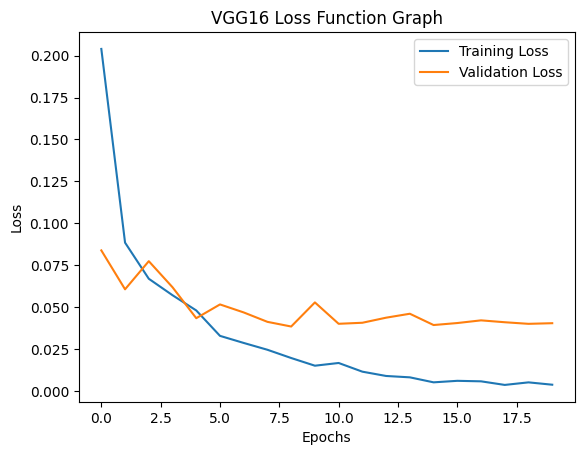

In [102]:
# Kayıp değerlerini çizdirme
plt.plot(train_loss_VGG16, label='Training Loss')
plt.plot(val_loss_VGG16, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('VGG16 Loss Function Graph')
plt.show()

In [103]:
# Test veri kümesi üzerinde tahmin yapma
y_pred_prob_VGG16 = model.predict(X_test)
y_pred_VGG16 = np.round(y_pred_prob_VGG16).astype(int)

33/33 [==============================] - 70s 2s/step


In [104]:
# Sınıflandırma raporunu oluşturma
print('VGG16 Ağı Sınıflandırma Raporu')
print(classification_report(y_test, y_pred_VGG16))

VGG16 Ağı Sınıflandırma Raporu
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       270
           1       0.99      0.99      0.99       777

    accuracy                           0.98      1047
   macro avg       0.98      0.98      0.98      1047
weighted avg       0.98      0.98      0.98      1047



In [105]:
# Confusion matrix'i hesapla
cm_VGG16 = confusion_matrix(y_test, y_pred_VGG16)

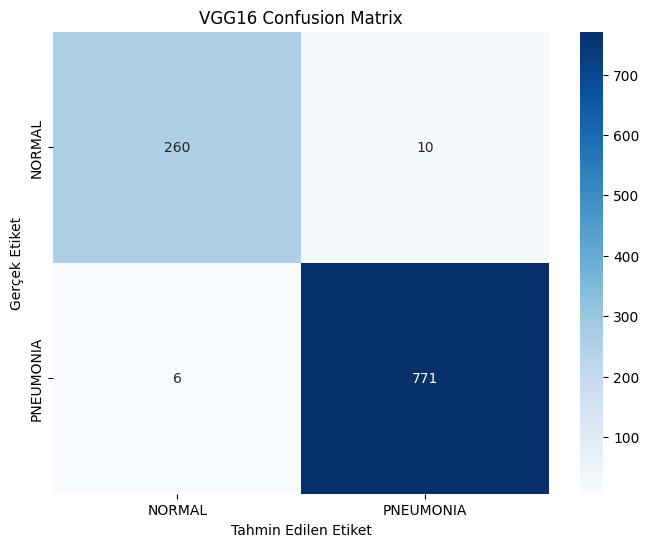

In [106]:
# Heatmap çizimi
plt.figure(figsize=(8, 6))
sns.heatmap(cm_VGG16, annot=True, fmt="d", cmap="Blues", xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('VGG16 Confusion Matrix')
plt.show()

In [107]:
# ROC eğrisi oluşturma
fpr_VGG16, tpr_VGG16, thresholds_VGG16 = roc_curve(y_test, y_pred_prob_VGG16)
roc_auc_VGG16 = auc(fpr_VGG16, tpr_VGG16)

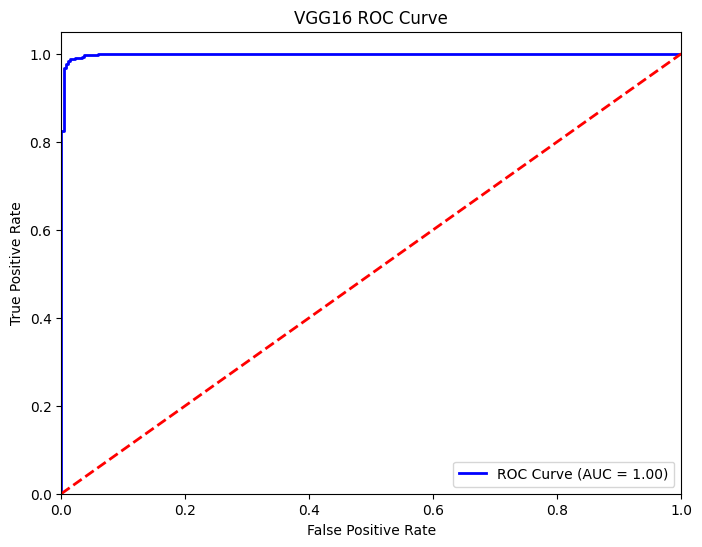

In [108]:
# ROC eğrisini çizme
plt.figure(figsize=(8, 6))
plt.plot(fpr_VGG16, tpr_VGG16, color='blue', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc_VGG16)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('VGG16 ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [109]:
# daha önce hiç görmediği veri kümesi üzerinde tahmin yapma
y_pred_prob_test_VGG16 = model.predict(data_test)
y_pred_test_VGG16 = np.round(y_pred_prob_test_VGG16).astype(int)

20/20 [==============================] - 41s 2s/step


In [110]:
# Sınıflandırma raporunu oluşturma
print('VGG16 Ağı Sınıflandırma Raporu (Test)')
print(classification_report(labels_test, y_pred_test_VGG16))

VGG16 Ağı Sınıflandırma Raporu (Test)
              precision    recall  f1-score   support

           0       0.99      0.36      0.53       234
           1       0.72      1.00      0.84       390

    accuracy                           0.76       624
   macro avg       0.85      0.68      0.68       624
weighted avg       0.82      0.76      0.72       624



In [111]:
# Confusion matrix'i hesapla
cm_test_VGG16 = confusion_matrix(labels_test, y_pred_test_VGG16)

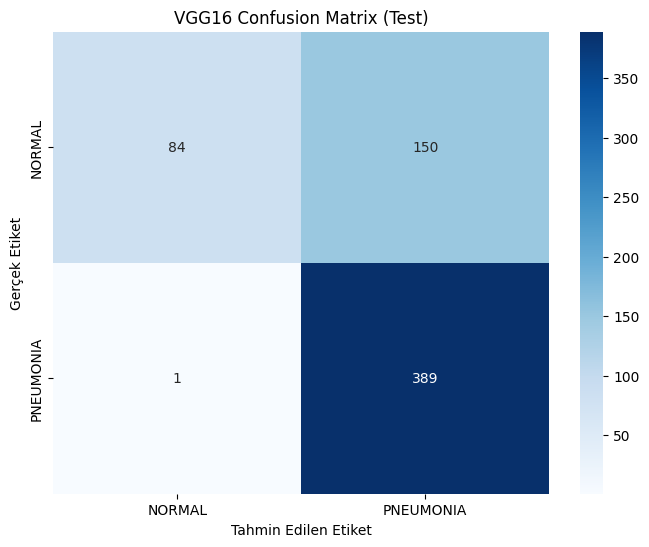

In [112]:
# Heatmap çizimi
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_VGG16, annot=True, fmt="d", cmap="Blues", xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('VGG16 Confusion Matrix (Test)')
plt.show()

In [113]:
# ROC eğrisi oluşturma
fpr_test_VGG16, tpr_test_VGG16, thresholds_test_VGG16 = roc_curve(labels_test, y_pred_prob_test_VGG16)
roc_auc_test_VGG16 = auc(fpr_test_VGG16, tpr_test_VGG16)

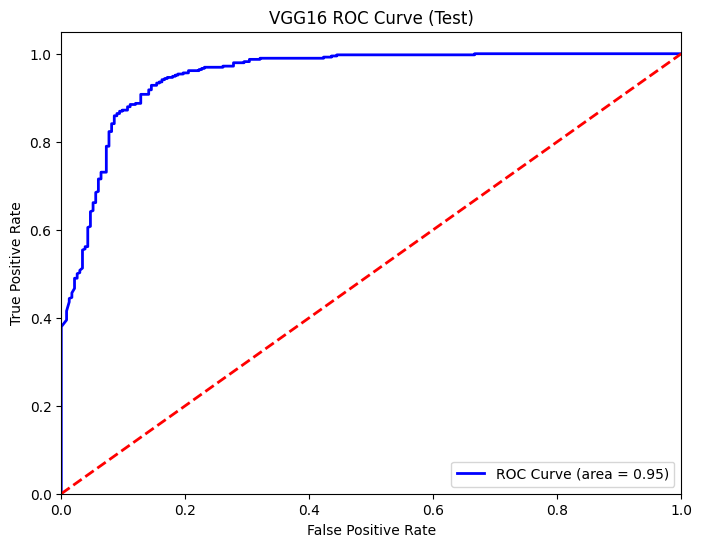

In [114]:
# ROC eğrisini çizme
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_VGG16, tpr_test_VGG16, color='blue', lw=2, label='ROC Curve (area = %0.2f)' % roc_auc_test_VGG16)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('VGG16 ROC Curve (Test)')
plt.legend(loc="lower right")
plt.show()

# VGG19

In [88]:
# VGG19 ağını yükleyerek FC katman setlerinin kapalı kalmasını sağlayalım
baseModel_19 = VGG19(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))

In [89]:
# baseModel üzerine yerleştirilecek classifier modelini oluşturalım
headModel_19 = baseModel_19.output
headModel_19 = Flatten(name="flatten")(headModel_19)
headModel_19 = Dense(64, activation="relu", name='fc1')(headModel_19)
headModel_19 = Dense(64, activation="relu", name='fc2')(headModel_19)
headModel_19 = Dropout(0.2)(headModel_19)
headModel_19 = Dense(1, activation="sigmoid", name='predictions')(headModel_19)

In [90]:
# oluşturduğumuz FC classifier katmanını baseModel üzerine yerleştirelim
model_19 = Model(inputs=baseModel_19.input, outputs=headModel_19)

In [91]:
# VGG19 modelinin evrişim tabanındaki tüm katmanları donduralım
for layer in baseModel_19.layers:
    layer.trainable = False

In [92]:
# hiperparametrelerimizi ayarlayalım
lr = 0.001 
epoch = 20
bs = 32

In [93]:
opt = Adam(learning_rate=lr)

In [94]:
# modeli compile edelim
model_19.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

In [95]:
model_19.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [96]:
# modelimizi çalıştıralım bakalım neler yapacak
H_VGG19 = model_19.fit(
    datagen.flow(X_train, y_train, batch_size=bs),
    steps_per_epoch=len(X_train) // bs,
    validation_data=datagen.flow(X_test, y_test, batch_size=bs),
    validation_steps=len(X_test) // bs,
    epochs=epoch
)

Epoch 1/20
130/130 [==============================] - 451s 3s/step - loss: 0.2628 - accuracy: 0.8868 - val_loss: 0.1908 - val_accuracy: 0.9268
Epoch 2/20
130/130 [==============================] - 454s 3s/step - loss: 0.2050 - accuracy: 0.9201 - val_loss: 0.1585 - val_accuracy: 0.9375
Epoch 3/20
130/130 [==============================] - 457s 4s/step - loss: 0.1772 - accuracy: 0.9328 - val_loss: 0.1458 - val_accuracy: 0.9434
Epoch 4/20
130/130 [==============================] - 457s 4s/step - loss: 0.1764 - accuracy: 0.9311 - val_loss: 0.2009 - val_accuracy: 0.9209
Epoch 5/20
130/130 [==============================] - 459s 4s/step - loss: 0.1582 - accuracy: 0.9412 - val_loss: 0.1182 - val_accuracy: 0.9551
Epoch 6/20
130/130 [==============================] - 458s 4s/step - loss: 0.1403 - accuracy: 0.9446 - val_loss: 0.1178 - val_accuracy: 0.9541
Epoch 7/20
130/130 [==============================] - 462s 4s/step - loss: 0.1287 - accuracy: 0.9502 - val_loss: 0.1936 - val_accuracy: 0.9316

In [97]:
# Eğitim sürecindeki kayıp değerlerini alın
train_loss_VGG19= H_VGG19.history['loss']
val_loss_VGG19 = H_VGG19.history['val_loss']

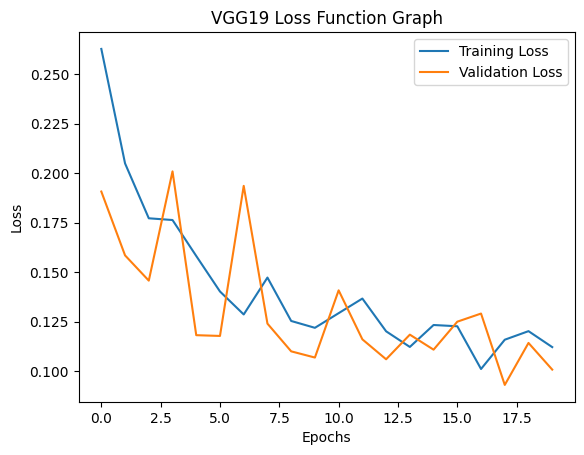

In [98]:
# Kayıp değerlerini çizdirme
plt.plot(train_loss_VGG19, label='Training Loss')
plt.plot(val_loss_VGG19, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('VGG19 Loss Function Graph')
plt.show()

In [99]:
# Test veri kümesi üzerinde tahmin yapma
y_pred_prob_VGG19 = model_19.predict(X_test)
y_pred_VGG19 = np.round(y_pred_prob_VGG19).astype(int)

33/33 [==============================] - 82s 2s/step


In [100]:
# Sınıflandırma raporunu oluşturma
print('VGG19 Ağı Sınıflandırma Raporu')
print(classification_report(y_test, y_pred_VGG19))

VGG19 Ağı Sınıflandırma Raporu
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       270
           1       0.99      0.93      0.96       777

    accuracy                           0.94      1047
   macro avg       0.91      0.96      0.93      1047
weighted avg       0.95      0.94      0.95      1047



In [101]:
# Confusion matrix'i hesapla
cm_VGG19 = confusion_matrix(y_test, y_pred_VGG19)

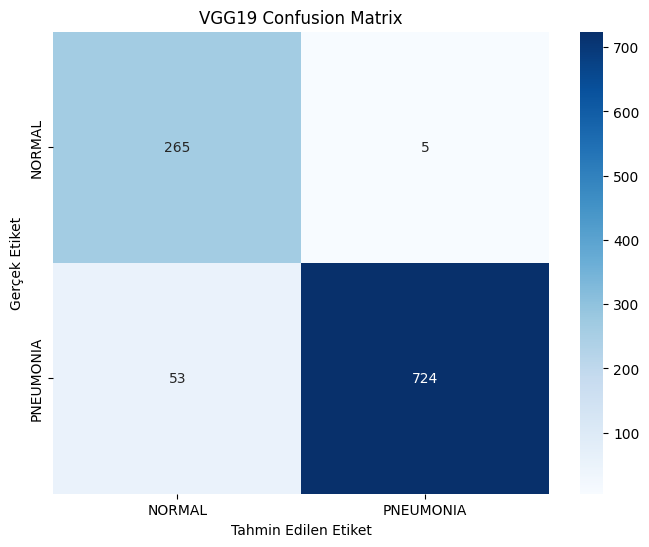

In [102]:
# Heatmap çizimi
plt.figure(figsize=(8, 6))
sns.heatmap(cm_VGG19, annot=True, fmt="d", cmap="Blues", xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('VGG19 Confusion Matrix')
plt.show()

In [103]:
# ROC eğrisi oluşturma
fpr_VGG19, tpr_VGG19, thresholds_VGG19 = roc_curve(y_test, y_pred_prob_VGG19)
roc_auc_VGG19 = auc(fpr_VGG19, tpr_VGG19)

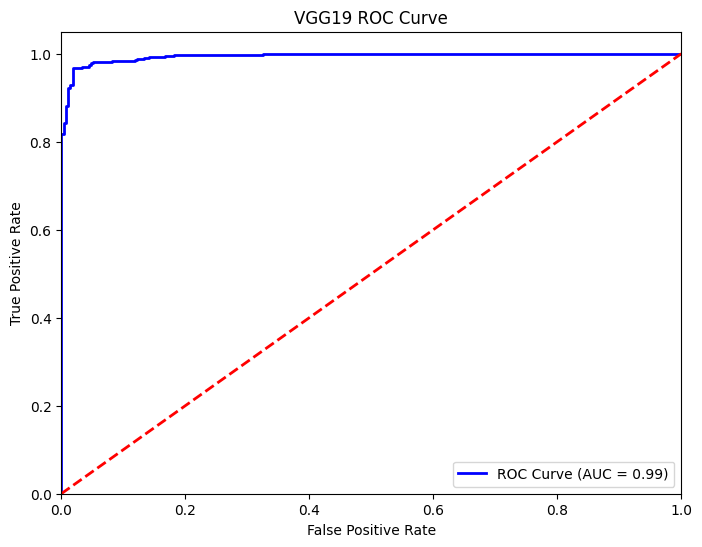

In [104]:
# ROC eğrisini çizme
plt.figure(figsize=(8, 6))
plt.plot(fpr_VGG19, tpr_VGG19, color='blue', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc_VGG19)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('VGG19 ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [105]:
# daha önce hiç görmediği veri kümesi üzerinde tahmin yapma
y_pred_prob_test_VGG19 = model_19.predict(data_test)
y_pred_test_VGG19 = np.round(y_pred_prob_test_VGG19).astype(int)

20/20 [==============================] - 48s 2s/step


In [106]:
# Sınıflandırma raporunu oluşturma
print('VGG19 Ağı Sınıflandırma Raporu (Test)')
print(classification_report(labels_test, y_pred_test_VGG19))

VGG19 Ağı Sınıflandırma Raporu (Test)
              precision    recall  f1-score   support

           0       0.95      0.83      0.88       234
           1       0.90      0.97      0.94       390

    accuracy                           0.92       624
   macro avg       0.93      0.90      0.91       624
weighted avg       0.92      0.92      0.92       624



In [107]:
# Confusion matrix'i hesapla
cm_test_VGG19 = confusion_matrix(labels_test, y_pred_test_VGG19)

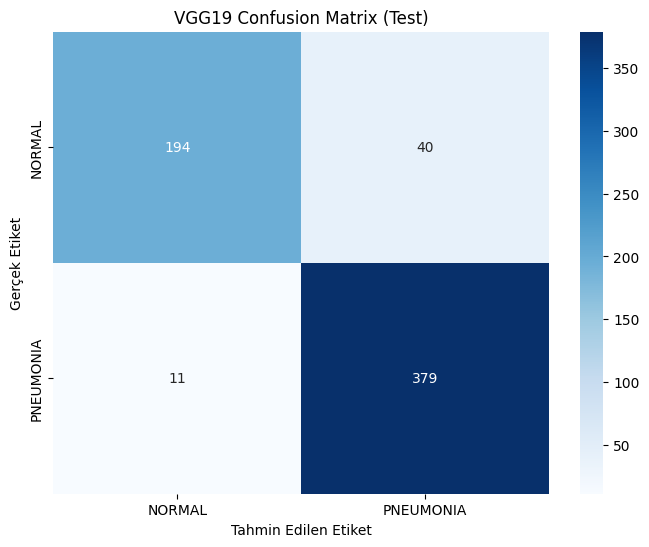

In [108]:
# Heatmap çizimi
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_VGG19, annot=True, fmt="d", cmap="Blues", xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('VGG19 Confusion Matrix (Test)')
plt.show()

In [109]:
# ROC eğrisi oluşturma
fpr_test_VGG19, tpr_test_VGG19, thresholds_test_VGG19 = roc_curve(labels_test, y_pred_prob_test_VGG19)
roc_auc_test_VGG19 = auc(fpr_test_VGG19, tpr_test_VGG19)

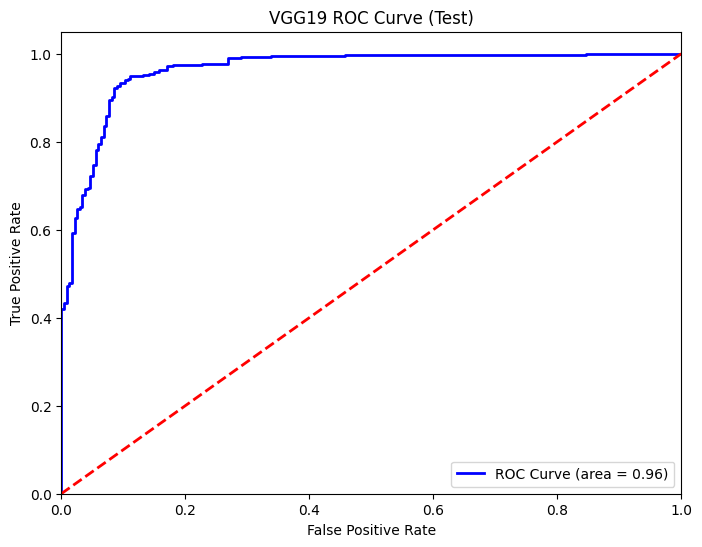

In [110]:
# ROC eğrisini çizme
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_VGG19, tpr_test_VGG19, color='blue', lw=2, label='ROC Curve (area = %0.2f)' % roc_auc_test_VGG19)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('VGG19 ROC Curve (Test)')
plt.legend(loc="lower right")
plt.show()

In [113]:
model_19.save('model_19.h5')

# ALEXNET

In [114]:
import keras
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D,BatchNormalization

In [115]:
model_alexnet = Sequential()

# 1. Konvolüsyonel Katman
model_alexnet.add(Conv2D(96, kernel_size=(11, 11), strides=4, padding='valid', activation='relu', 
                         input_shape=(224, 224, 3), kernel_initializer='he_normal'))
# Max Havuzlama
model_alexnet.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
# 2. Konvolüsyonel Katman
model_alexnet.add(Conv2D(256, kernel_size=(5, 5), strides=1, padding='same', activation='relu', kernel_initializer='he_normal'))
# Max Havuzlama
model_alexnet.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
# 3. Konvolüsyonel Katman
model_alexnet.add(Conv2D(384, kernel_size=(3, 3), strides=1, padding='same', activation='relu', kernel_initializer='he_normal'))
# 4. Konvolüsyonel Katman
model_alexnet.add(Conv2D(384, kernel_size=(3, 3), strides=1, padding='same', activation='relu', kernel_initializer='he_normal'))
# 5. Konvolüsyonel Katman
model_alexnet.add(Conv2D(256, kernel_size=(3, 3), strides=1, padding='same', activation='relu', kernel_initializer='he_normal'))
# Max Havuzlama
model_alexnet.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
# Tam Bağlantılı Katmana Geçiş
model_alexnet.add(Flatten())
# 1. Tam Bağlantılı Katman
model_alexnet.add(Dense(4096, activation='relu'))
# Aşırı Öğrenmeyi Önlemek için Dropout Ekleme
model_alexnet.add(Dropout(0.2))
# 2. Tam Bağlantılı Katman
model_alexnet.add(Dense(4096, activation='relu'))
# Dropout Ekleme
model_alexnet.add(Dropout(0.2))
# 3. Tam Bağlantılı Katman
model_alexnet.add(Dense(1000, activation='relu'))
# Dropout Ekleme
model_alexnet.add(Dropout(0.2))
# Çıkış Katmanı
model_alexnet.add(Dense(1, activation='sigmoid'))

In [116]:
model_alexnet.compile(optimizer= tf.keras.optimizers.Adam(0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [117]:
model_alexnet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 12, 12, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 384)       885120    
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 384)      

In [118]:
H_AlexNet =model_alexnet.fit(datagen.flow(X_train, y_train, batch_size=bs),
    steps_per_epoch=len(X_train) // bs,
    validation_data=datagen.flow(X_test, y_test, batch_size=bs),
    validation_steps=len(X_test) // bs,
    epochs=epoch)

Epoch 1/20
130/130 [==============================] - 89s 673ms/step - loss: 1.5454 - accuracy: 0.7414 - val_loss: 0.4177 - val_accuracy: 0.7393
Epoch 2/20
130/130 [==============================] - 90s 692ms/step - loss: 0.4159 - accuracy: 0.8033 - val_loss: 0.3464 - val_accuracy: 0.8604
Epoch 3/20
130/130 [==============================] - 89s 685ms/step - loss: 0.3202 - accuracy: 0.8676 - val_loss: 0.2411 - val_accuracy: 0.8926
Epoch 4/20
130/130 [==============================] - 89s 684ms/step - loss: 0.2816 - accuracy: 0.8868 - val_loss: 0.2620 - val_accuracy: 0.8945
Epoch 5/20
130/130 [==============================] - 89s 683ms/step - loss: 0.2804 - accuracy: 0.8830 - val_loss: 0.2571 - val_accuracy: 0.8906
Epoch 6/20
130/130 [==============================] - 89s 687ms/step - loss: 0.2475 - accuracy: 0.9001 - val_loss: 0.2172 - val_accuracy: 0.9053
Epoch 7/20
130/130 [==============================] - 90s 691ms/step - loss: 0.2496 - accuracy: 0.8948 - val_loss: 0.2057 - val_ac

In [119]:
# Eğitim sürecindeki kayıp değerlerini alın
train_loss_AlexNet= H_AlexNet.history['loss']
val_loss_AlexNet = H_AlexNet.history['val_loss']

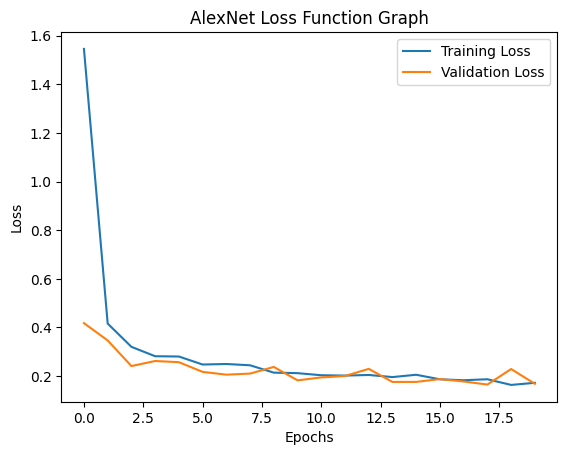

In [120]:
# Kayıp değerlerini çizdirme
plt.plot(train_loss_AlexNet, label='Training Loss')
plt.plot(val_loss_AlexNet, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('AlexNet Loss Function Graph')
plt.show()

In [121]:
# Test veri kümesi üzerinde tahmin yapma
y_pred_prob_AlexNet = model_alexnet.predict(X_test)
y_pred_AlexNet = np.round(y_pred_prob_AlexNet).astype(int)

33/33 [==============================] - 4s 126ms/step


In [122]:
# Sınıflandırma raporunu oluşturma
print('AlexNet Ağı Sınıflandırma Raporu')
print(classification_report(y_test, y_pred_AlexNet))

AlexNet Ağı Sınıflandırma Raporu
              precision    recall  f1-score   support

           0       0.95      0.81      0.87       270
           1       0.94      0.98      0.96       777

    accuracy                           0.94      1047
   macro avg       0.94      0.90      0.92      1047
weighted avg       0.94      0.94      0.94      1047



In [123]:
# Confusion matrix'i hesapla
cm_AlexNet = confusion_matrix(y_test, y_pred_AlexNet)

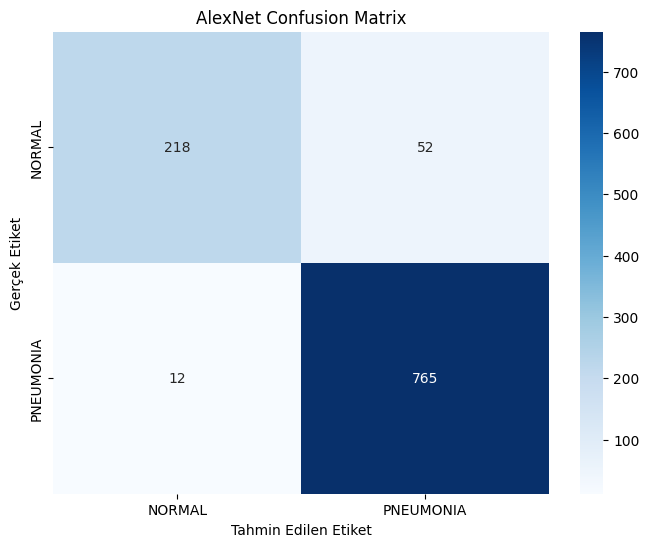

In [124]:
# Heatmap çizimi
plt.figure(figsize=(8, 6))
sns.heatmap(cm_AlexNet, annot=True, fmt="d", cmap="Blues", xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('AlexNet Confusion Matrix')
plt.show()

In [125]:
# ROC eğrisi oluşturma
fpr_AlexNet, tpr_AlexNet, thresholds_AlexNet = roc_curve(y_test, y_pred_prob_AlexNet)
roc_auc_AlexNet = auc(fpr_AlexNet, tpr_AlexNet)

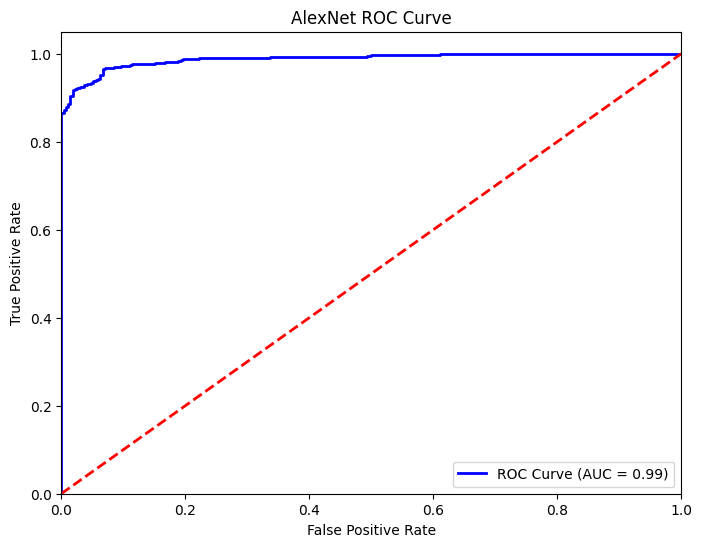

In [126]:
# ROC eğrisini çizme
plt.figure(figsize=(8, 6))
plt.plot(fpr_AlexNet, tpr_AlexNet, color='blue', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc_AlexNet)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AlexNet ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [127]:
# daha önce hiç görmediği veri kümesi üzerinde tahmin yapma
y_pred_prob_test_AlexNet = model_alexnet.predict(data_test)
y_pred_test_AlexNet = np.round(y_pred_prob_test_AlexNet).astype(int)

20/20 [==============================] - 3s 132ms/step


In [128]:
# Sınıflandırma raporunu oluşturma
print('AlexNet Ağı Sınıflandırma Raporu (Test)')
print(classification_report(labels_test, y_pred_test_AlexNet))

AlexNet Ağı Sınıflandırma Raporu (Test)
              precision    recall  f1-score   support

           0       0.99      0.37      0.54       234
           1       0.72      1.00      0.84       390

    accuracy                           0.76       624
   macro avg       0.86      0.68      0.69       624
weighted avg       0.82      0.76      0.73       624



In [129]:
# Confusion matrix'i hesapla
cm_test_AlexNet = confusion_matrix(labels_test, y_pred_test_AlexNet)

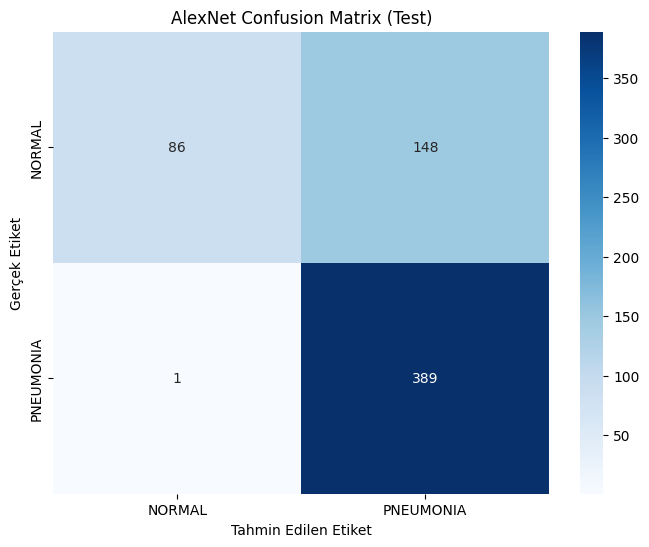

In [130]:
# Heatmap çizimi
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_AlexNet, annot=True, fmt="d", cmap="Blues", xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('AlexNet Confusion Matrix (Test)')
plt.show()

In [131]:
# ROC eğrisi oluşturma
fpr_test_AlexNet, tpr_test_AlexNet, thresholds_test_AlexNet = roc_curve(labels_test, y_pred_prob_test_AlexNet)
roc_auc_test_AlexNet = auc(fpr_test_AlexNet, tpr_test_AlexNet)

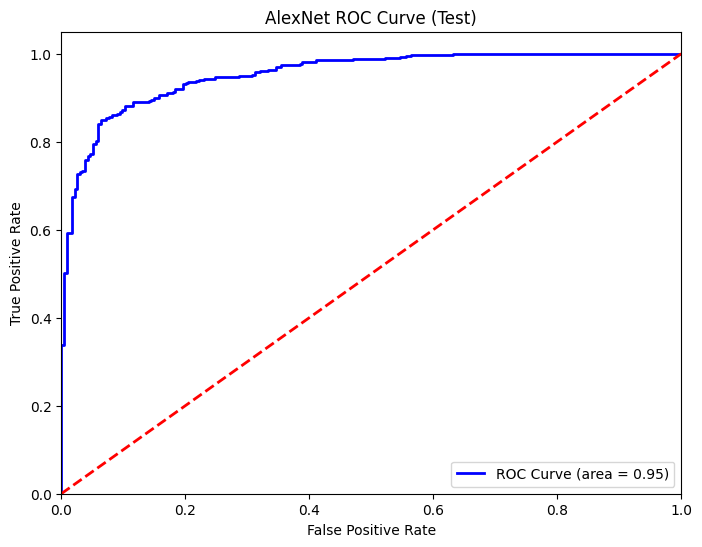

In [132]:
# ROC eğrisini çizme
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_AlexNet, tpr_test_AlexNet, color='blue', lw=2, label='ROC Curve (area = %0.2f)' % roc_auc_test_AlexNet)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AlexNet ROC Curve (Test)')
plt.legend(loc="lower right")
plt.show()

# RESNET

In [133]:
resnet50 = ResNet50V2(weights = "imagenet", input_shape = (224,224,3), include_top = False)

In [134]:
for layer in resnet50.layers:
    layer.trainable = False

In [135]:
model_resnet = Sequential()
model_resnet.add(resnet50)
model_resnet.add(Flatten())
model_resnet.add(Dense(units = 128, activation = "relu"))
model_resnet.add(Dropout(0.5))
model_resnet.add(Dense(units = 1, activation = "sigmoid"))

In [136]:
model_resnet.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [137]:
model_resnet.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 flatten_3 (Flatten)         (None, 100352)            0         
                                                                 
 dense_10 (Dense)            (None, 128)               12845184  
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 36410113 (138.89 MB)
Trainable params: 12845313 (49.00 MB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [138]:
H_ResNet = model_resnet.fit(datagen.flow(X_train, y_train, batch_size=bs),
    steps_per_epoch=len(X_train) // bs,
    validation_data=datagen.flow(X_test, y_test, batch_size=bs),
    validation_steps=len(X_test) // bs,
    epochs=epoch)

Epoch 1/20
130/130 [==============================] - 130s 982ms/step - loss: 1.2008 - accuracy: 0.8736 - val_loss: 0.1717 - val_accuracy: 0.9268
Epoch 2/20
130/130 [==============================] - 134s 1s/step - loss: 0.2350 - accuracy: 0.9193 - val_loss: 0.1471 - val_accuracy: 0.9453
Epoch 3/20
130/130 [==============================] - 133s 1s/step - loss: 0.2184 - accuracy: 0.9189 - val_loss: 0.1149 - val_accuracy: 0.9541
Epoch 4/20
130/130 [==============================] - 133s 1s/step - loss: 0.1847 - accuracy: 0.9352 - val_loss: 0.1312 - val_accuracy: 0.9531
Epoch 5/20
130/130 [==============================] - 132s 1s/step - loss: 0.1936 - accuracy: 0.9338 - val_loss: 0.1212 - val_accuracy: 0.9570
Epoch 6/20
130/130 [==============================] - 134s 1s/step - loss: 0.1740 - accuracy: 0.9364 - val_loss: 0.1173 - val_accuracy: 0.9590
Epoch 7/20
130/130 [==============================] - 133s 1s/step - loss: 0.1577 - accuracy: 0.9412 - val_loss: 0.0918 - val_accuracy: 0.9

In [139]:
# Eğitim sürecindeki kayıp değerlerini alın
train_loss_ResNet= H_ResNet.history['loss']
val_loss_ResNet = H_ResNet.history['val_loss']

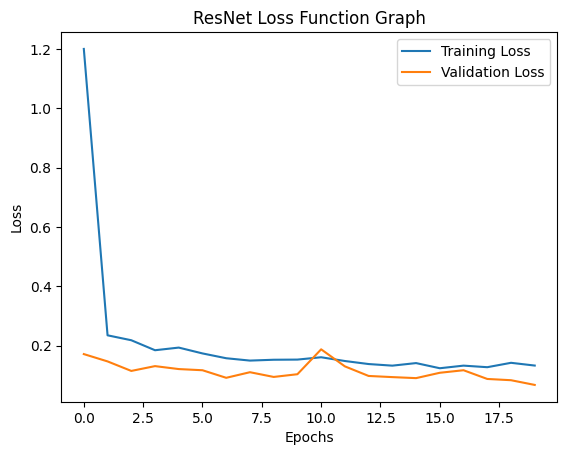

In [140]:
# Kayıp değerlerini çizdirme
plt.plot(train_loss_ResNet, label='Training Loss')
plt.plot(val_loss_ResNet, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('ResNet Loss Function Graph')
plt.show()

In [141]:
# Test veri kümesi üzerinde tahmin yapma
y_pred_prob_ResNet = model_resnet.predict(X_test)
y_pred_ResNet = np.round(y_pred_prob_ResNet).astype(int)

33/33 [==============================] - 21s 622ms/step


In [142]:
# Sınıflandırma raporunu oluşturma
print('ResNet Ağı Sınıflandırma Raporu')
print(classification_report(y_test, y_pred_ResNet))

ResNet Ağı Sınıflandırma Raporu
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       270
           1       0.99      0.96      0.98       777

    accuracy                           0.97      1047
   macro avg       0.95      0.97      0.96      1047
weighted avg       0.97      0.97      0.97      1047



In [143]:
# Confusion matrix'i hesapla
cm_ResNet = confusion_matrix(y_test, y_pred_ResNet)

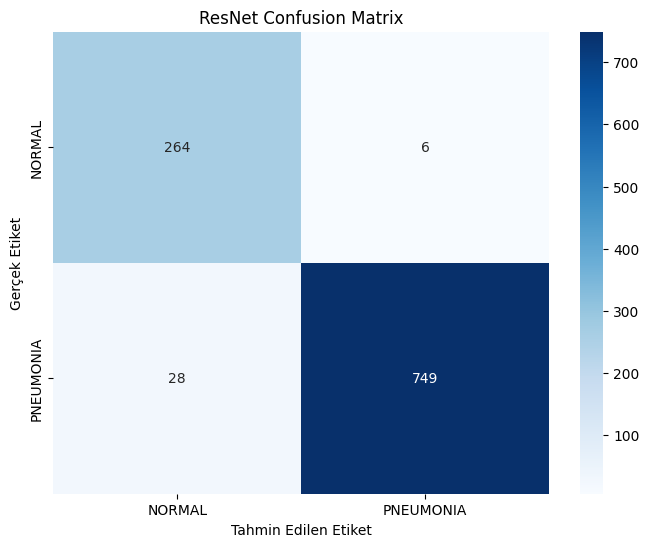

In [144]:
# Heatmap çizimi
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ResNet, annot=True, fmt="d", cmap="Blues", xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('ResNet Confusion Matrix')
plt.show()

In [145]:
# ROC eğrisi oluşturma
fpr_ResNet, tpr_ResNet, thresholds_ResNet = roc_curve(y_test, y_pred_prob_ResNet)
roc_auc_ResNet = auc(fpr_ResNet, tpr_ResNet)

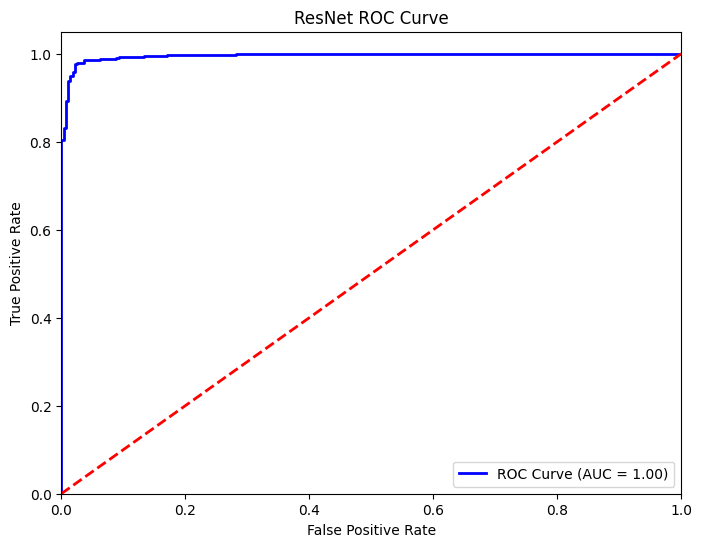

In [146]:
# ROC eğrisini çizme
plt.figure(figsize=(8, 6))
plt.plot(fpr_ResNet, tpr_ResNet, color='blue', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc_ResNet)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ResNet ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [147]:
# daha önce hiç görmediği veri kümesi üzerinde tahmin yapma
y_pred_prob_test_ResNet = model_resnet.predict(data_test)
y_pred_test_ResNet = np.round(y_pred_prob_test_ResNet).astype(int)

20/20 [==============================] - 12s 583ms/step


In [148]:
# Sınıflandırma raporunu oluşturma
print('ResNet Ağı Sınıflandırma Raporu (Test)')
print(classification_report(labels_test, y_pred_test_ResNet))

ResNet Ağı Sınıflandırma Raporu (Test)
              precision    recall  f1-score   support

           0       0.95      0.80      0.87       234
           1       0.89      0.97      0.93       390

    accuracy                           0.91       624
   macro avg       0.92      0.89      0.90       624
weighted avg       0.91      0.91      0.91       624



In [149]:
# Confusion matrix'i hesapla
cm_test_ResNet = confusion_matrix(labels_test, y_pred_test_ResNet)

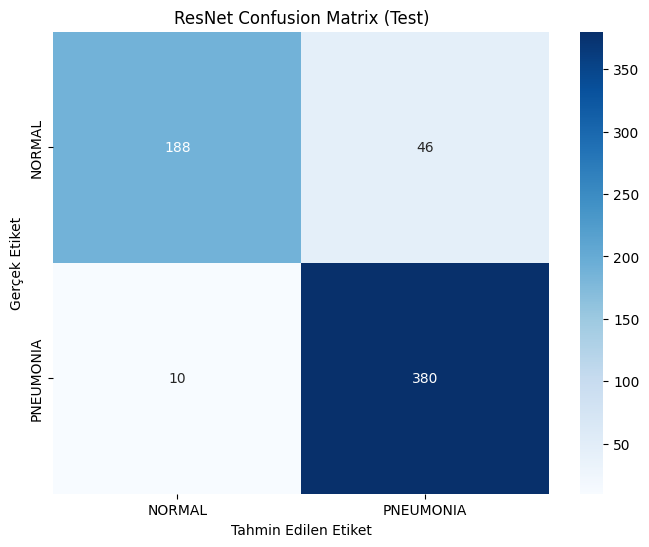

In [150]:
# Heatmap çizimi
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_ResNet, annot=True, fmt="d", cmap="Blues", xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('ResNet Confusion Matrix (Test)')
plt.show()

In [151]:
# ROC eğrisi oluşturma
fpr_test_ResNet, tpr_test_ResNet, thresholds_test_ResNet = roc_curve(labels_test, y_pred_prob_test_ResNet)
roc_auc_test_ResNet= auc(fpr_test_ResNet, tpr_test_ResNet)

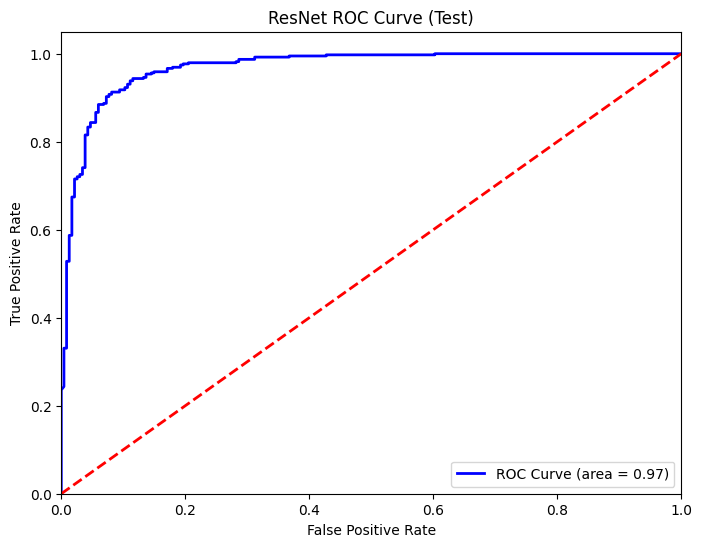

In [152]:
# ROC eğrisini çizme
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_ResNet, tpr_test_ResNet, color='blue', lw=2, label='ROC Curve (area = %0.2f)' % roc_auc_test_ResNet)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ResNet ROC Curve (Test)')
plt.legend(loc="lower right")
plt.show()

# GoogLeNet

In [161]:
def Inception_block(input_layer, f1, f2_conv1, f2_conv3, f3_conv1, f3_conv5, f4): 
  # Input: 
  # - f1: number of filters of the 1x1 convolutional layer in the first path
  # - f2_conv1, f2_conv3 are number of filters corresponding to the 1x1 and 3x3 convolutional layers in the second path
  # - f3_conv1, f3_conv5 are the number of filters corresponding to the 1x1 and 5x5  convolutional layer in the third path
  # - f4: number of filters of the 1x1 convolutional layer in the fourth path

  # 1st path:
  path1 = Conv2D(filters=f1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)

  # 2nd path
  path2 = Conv2D(filters = f2_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path2 = Conv2D(filters = f2_conv3, kernel_size = (3,3), padding = 'same', activation = 'relu')(path2)

  # 3rd path
  path3 = Conv2D(filters = f3_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path3 = Conv2D(filters = f3_conv5, kernel_size = (5,5), padding = 'same', activation = 'relu')(path3)

  # 4th path
  path4 = MaxPooling2D((3,3), strides= (1,1), padding = 'same')(input_layer)
  path4 = Conv2D(filters = f4, kernel_size = (1,1), padding = 'same', activation = 'relu')(path4)

  output_layer = concatenate([path1, path2, path3, path4], axis = -1)

  return output_layer

In [162]:
def GoogLeNet():
    # input layer
    input_layer = Input(shape=(224, 224, 3))

    # convolutional layer: filters = 64, kernel_size = (7,7), strides = 2
    X = Conv2D(filters=64, kernel_size=(7,7), strides=2, padding='valid', activation='relu')(input_layer)

    # max-pooling layer: pool_size = (3,3), strides = 2
    X = MaxPooling2D(pool_size=(3,3), strides=2)(X)

    # convolutional layer: filters = 64, strides = 1
    X = Conv2D(filters=64, kernel_size=(1,1), strides=1, padding='same', activation='relu')(X)

    # convolutional layer: filters = 192, kernel_size = (3,3)
    X = Conv2D(filters=192, kernel_size=(3,3), padding='same', activation='relu')(X)

    # max-pooling layer: pool_size = (3,3), strides = 2
    X = MaxPooling2D(pool_size=(3,3), strides=2)(X)

    # 1st Inception block
    X = Inception_block(X, f1=64, f2_conv1=96, f2_conv3=128, f3_conv1=16, f3_conv5=32, f4=32)

    # 2nd Inception block
    X = Inception_block(X, f1=128, f2_conv1=128, f2_conv3=192, f3_conv1=32, f3_conv5=96, f4=64)

    # max-pooling layer: pool_size = (3,3), strides = 2
    X = MaxPooling2D(pool_size=(3,3), strides=2)(X)

    # 3rd Inception block
    X = Inception_block(X, f1=192, f2_conv1=96, f2_conv3=208, f3_conv1=16, f3_conv5=48, f4=64)

    # 4th Inception block
    X = Inception_block(X, f1=160, f2_conv1=112, f2_conv3=224, f3_conv1=24, f3_conv5=64, f4=64)

    # 5th Inception block
    X = Inception_block(X, f1=128, f2_conv1=128, f2_conv3=256, f3_conv1=24, f3_conv5=64, f4=64)

    # 6th Inception block
    X = Inception_block(X, f1=112, f2_conv1=144, f2_conv3=288, f3_conv1=32, f3_conv5=64, f4=64)

    # 7th Inception block
    X = Inception_block(X, f1=256, f2_conv1=160, f2_conv3=320, f3_conv1=32, f3_conv5=128, f4=128)

    # max-pooling layer: pool_size = (3,3), strides = 2
    X = MaxPooling2D(pool_size=(3,3), strides=2)(X)

    # 8th Inception block
    X = Inception_block(X, f1=256, f2_conv1=160, f2_conv3=320, f3_conv1=32, f3_conv5=128, f4=128)

    # 9th Inception block
    X = Inception_block(X, f1=384, f2_conv1=192, f2_conv3=384, f3_conv1=48, f3_conv5=128, f4=128)

    # Global Average pooling layer 
    X = GlobalAveragePooling2D(name='GAPL')(X)

    # Dropout layer
    X = Dropout(0.4)(X)

    # output layer
    X = Dense(1, activation='sigmoid')(X)
    
    # model
    model = Model(inputs=input_layer, outputs=X, name='GoogLeNet')

    return model

In [163]:
model_googlenet = GoogLeNet()

In [164]:
model_googlenet.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# Giriş katmanı
input_layer = Input(shape=(224, 224, 3))

# Konvolüsyonel katman: filtre sayısı = 64, kernel boyutu = (7,7), strides = 2
X = Conv2D(filters=64, kernel_size=(7,7), strides=2, padding='valid', activation='relu')(input_layer)

# Max-Pooling katmanı: havuz boyutu = (3,3), strides = 2
X = MaxPooling2D(pool_size=(3,3), strides=2)(X)

# Konvolüsyonel katman: filtre sayısı = 64, strides = 1
X = Conv2D(filters=64, kernel_size=(1,1), strides=1, padding='same', activation='relu')(X)

# Konvolüsyonel katman: filtre sayısı = 192, kernel boyutu = (3,3)
X = Conv2D(filters=192, kernel_size=(3,3), padding='same', activation='relu')(X)

# Max-Pooling katmanı: havuz boyutu = (3,3), strides = 2
X = MaxPooling2D(pool_size=(3,3), strides=2)(X)

# 1. Inception bloğu
path1 = Conv2D(filters=64, kernel_size=(1,1), padding='same', activation='relu')(X)
path2 = Conv2D(filters=96, kernel_size=(1,1), padding='same', activation='relu')(X)
path2 = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')(path2)
path3 = Conv2D(filters=16, kernel_size=(1,1), padding='same', activation='relu')(X)
path3 = Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu')(path3)
path4 = MaxPooling2D((3,3), strides=(1,1), padding='same')(X)
path4 = Conv2D(filters=32, kernel_size=(1,1), padding='same', activation='relu')(path4)
X = concatenate([path1, path2, path3, path4], axis=-1)

# 2. Inception bloğu
path1 = Conv2D(filters=128, kernel_size=(1,1), padding='same', activation='relu')(X)
path2 = Conv2D(filters=128, kernel_size=(1,1), padding='same', activation='relu')(X)
path2 = Conv2D(filters=192, kernel_size=(3,3), padding='same', activation='relu')(path2)
path3 = Conv2D(filters=32, kernel_size=(1,1), padding='same', activation='relu')(X)
path3 = Conv2D(filters=96, kernel_size=(5,5), padding='same', activation='relu')(path3)
path4 = MaxPooling2D((3,3), strides=(1,1), padding='same')(X)
path4 = Conv2D(filters=64, kernel_size=(1,1), padding='same', activation='relu')(path4)
X = concatenate([path1, path2, path3, path4], axis=-1)

# Max-Pooling katmanı: havuz boyutu = (3,3), strides = 2
X = MaxPooling2D(pool_size=(3,3), strides=2)(X)

# 3. Inception bloğu
path1 = Conv2D(filters=192, kernel_size=(1,1), padding='same', activation='relu')(X)
path2 = Conv2D(filters=96, kernel_size=(1,1), padding='same', activation='relu')(X)
path2 = Conv2D(filters=208, kernel_size=(3,3), padding='same', activation='relu')(path2)
path3 = Conv2D(filters=16, kernel_size=(1,1), padding='same', activation='relu')(X)
path3 = Conv2D(filters=48, kernel_size=(5,5), padding='same', activation='relu')(path3)
path4 = MaxPooling2D((3,3), strides=(1,1), padding='same')(X)
path4 = Conv2D(filters=64, kernel_size=(1,1), padding='same', activation='relu')(path4)
X = concatenate([path1, path2, path3, path4], axis=-1)

# 4. Inception bloğu
path1 = Conv2D(filters=160, kernel_size=(1,1), padding='same', activation='relu')(X)
path2 = Conv2D(filters=112, kernel_size=(1,1), padding='same', activation='relu')(X)
path2 = Conv2D(filters=224, kernel_size=(3,3), padding='same', activation='relu')(path2)
path3 = Conv2D(filters=24, kernel_size=(1,1), padding='same', activation='relu')(X)
path3 = Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu')(path3)
path4 = MaxPooling2D((3,3), strides=(1,1), padding='same')(X)
path4 = Conv2D(filters=64, kernel_size=(1,1), padding='same', activation='relu')(path4)
X = concatenate([path1, path2, path3, path4], axis=-1)

# 5. Inception bloğu
path1 = Conv2D(filters=128, kernel_size=(1,1), padding='same', activation='relu')(X)
path2 = Conv2D(filters=128, kernel_size=(1,1), padding='same', activation='relu')(X)
path2 = Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu')(path2)
path3 = Conv2D(filters=24, kernel_size=(1,1), padding='same', activation='relu')(X)
path3 = Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu')(path3)
path4 = MaxPooling2D((3,3), strides=(1,1), padding='same')(X)
path4 = Conv2D(filters=64, kernel_size=(1,1), padding='same', activation='relu')(path4)
X = concatenate([path1, path2, path3, path4], axis=-1)

# 6. Inception bloğu
path1 = Conv2D(filters=112, kernel_size=(1,1), padding='same', activation='relu')(X)
path2 = Conv2D(filters=144, kernel_size=(1,1), padding='same', activation='relu')(X)
path2 = Conv2D(filters=288, kernel_size=(3,3), padding='same', activation='relu')(path2)
path3 = Conv2D(filters=32, kernel_size=(1,1), padding='same', activation='relu')(X)
path3 = Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu')(path3)
path4 = MaxPooling2D((3,3), strides=(1,1), padding='same')(X)
path4 = Conv2D(filters=64, kernel_size=(1,1), padding='same', activation='relu')(path4)
X = concatenate([path1, path2, path3, path4], axis=-1)

# 7. Inception bloğu
path1 = Conv2D(filters=256, kernel_size=(1,1), padding='same', activation='relu')(X)
path2 = Conv2D(filters=160, kernel_size=(1,1), padding='same', activation='relu')(X)
path2 = Conv2D(filters=320, kernel_size=(3,3), padding='same', activation='relu')(path2)
path3 = Conv2D(filters=32, kernel_size=(1,1), padding='same', activation='relu')(X)
path3 = Conv2D(filters=128, kernel_size=(5,5), padding='same', activation='relu')(path3)
path4 = MaxPooling2D((3,3), strides=(1,1), padding='same')(X)
path4 = Conv2D(filters=128, kernel_size=(1,1), padding='same', activation='relu')(path4)
X = concatenate([path1, path2, path3, path4], axis=-1)

# Max-Pooling katmanı: havuz boyutu = (3,3), strides = 2
X = MaxPooling2D(pool_size=(3,3), strides=2)(X)

# 8. Inception bloğu
path1 = Conv2D(filters=256, kernel_size=(1,1), padding='same', activation='relu')(X)
path2 = Conv2D(filters=160, kernel_size=(1,1), padding='same', activation='relu')(X)
path2 = Conv2D(filters=320, kernel_size=(3,3), padding='same', activation='relu')(path2)
path3 = Conv2D(filters=32, kernel_size=(1,1), padding='same', activation='relu')(X)
path3 = Conv2D(filters=128, kernel_size=(5,5), padding='same', activation='relu')(path3)
path4 = MaxPooling2D((3,3), strides=(1,1), padding='same')(X)
path4 = Conv2D(filters=128, kernel_size=(1,1), padding='same', activation='relu')(path4)
X = concatenate([path1, path2, path3, path4], axis=-1)

# 9. Inception bloğu
path1 = Conv2D(filters=384, kernel_size=(1,1), padding='same', activation='relu')(X)
path2 = Conv2D(filters=192, kernel_size=(1,1), padding='same', activation='relu')(X)
path2 = Conv2D(filters=384, kernel_size=(3,3), padding='same', activation='relu')(path2)
path3 = Conv2D(filters=48, kernel_size=(1,1), padding='same', activation='relu')(X)
path3 = Conv2D(filters=128, kernel_size=(5,5), padding='same', activation='relu')(path3)
path4 = MaxPooling2D((3,3), strides=(1,1), padding='same')(X)
path4 = Conv2D(filters=128, kernel_size=(1,1), padding='same', activation='relu')(path4)
X = concatenate([path1, path2, path3, path4], axis=-1)

# Global Ortalama Havuzlama katmanı
X = GlobalAveragePooling2D(name='GAPL')(X)

# Dropout katmanı
X = Dropout(0.4)(X)

# Çıkış katmanı
output_layer = Dense(1, activation='sigmoid')(X)

# Modeli oluştur
model_googlenet = Model(inputs=input_layer, outputs=output_layer, name='GoogLeNet')

# Modeli derle
model_googlenet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [165]:
model_googlenet.summary()

Model: "GoogLeNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_67 (Conv2D)          (None, 109, 109, 64)         9472      ['input_6[0][0]']             
                                                                                                  
 max_pooling2d_24 (MaxPooli  (None, 54, 54, 64)           0         ['conv2d_67[0][0]']           
 ng2D)                                                                                            
                                                                                                  
 conv2d_68 (Conv2D)          (None, 54, 54, 64)           4160      ['max_pooling2d_24[0][

In [166]:
H_GoogleNet = model_googlenet.fit(
    datagen.flow(X_train, y_train, batch_size=bs),
    steps_per_epoch=len(X_train) // bs,
    validation_data=datagen.flow(X_test, y_test, batch_size=bs),
    validation_steps=len(X_test) // bs,
    epochs=30
)

Epoch 1/30
130/130 [==============================] - 152s 1s/step - loss: 0.5935 - accuracy: 0.7402 - val_loss: 0.5732 - val_accuracy: 0.7412
Epoch 2/30
130/130 [==============================] - 150s 1s/step - loss: 0.5354 - accuracy: 0.7409 - val_loss: 0.4501 - val_accuracy: 0.7490
Epoch 3/30
130/130 [==============================] - 152s 1s/step - loss: 0.4365 - accuracy: 0.7804 - val_loss: 0.7156 - val_accuracy: 0.7422
Epoch 4/30
130/130 [==============================] - 148s 1s/step - loss: 0.4372 - accuracy: 0.7790 - val_loss: 0.4164 - val_accuracy: 0.7432
Epoch 5/30
130/130 [==============================] - 149s 1s/step - loss: 0.4051 - accuracy: 0.8139 - val_loss: 0.3775 - val_accuracy: 0.8271
Epoch 6/30
130/130 [==============================] - 148s 1s/step - loss: 0.6792 - accuracy: 0.8047 - val_loss: 0.4117 - val_accuracy: 0.8154
Epoch 7/30
130/130 [==============================] - 148s 1s/step - loss: 0.3888 - accuracy: 0.8221 - val_loss: 0.4188 - val_accuracy: 0.8125

In [167]:
# Eğitim sürecindeki kayıp değerlerini alın
train_loss_GoogLeNet= H_GoogleNet_2.history['loss']
val_loss_GoogLeNet = H_GoogleNet_2.history['val_loss']

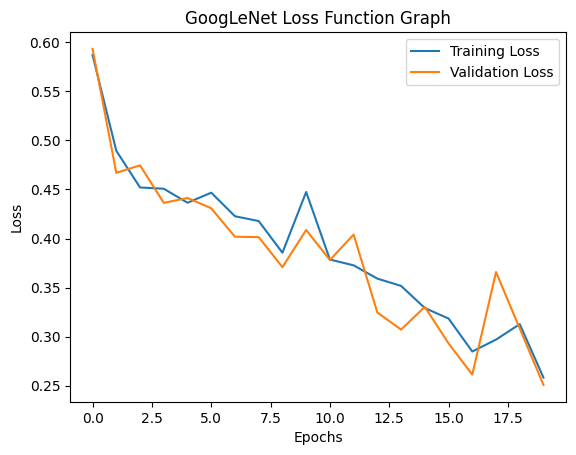

In [168]:
# Kayıp değerlerini çizdirme
plt.plot(train_loss_GoogLeNet, label='Training Loss')
plt.plot(val_loss_GoogLeNet, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('GoogLeNet Loss Function Graph')
plt.show()

In [169]:
# Test veri kümesi üzerinde tahmin yapma
y_pred_prob_GoogLeNet = model_googlenet.predict(X_test)
y_pred_GoogLeNet = np.round(y_pred_prob_GoogLeNet).astype(int)

33/33 [==============================] - 7s 196ms/step


In [170]:
# Sınıflandırma raporunu oluşturma
print('GoogLeNet Ağı Sınıflandırma Raporu')
print(classification_report(y_test, y_pred_GoogLeNet))

GoogLeNet Ağı Sınıflandırma Raporu
              precision    recall  f1-score   support

           0       0.84      0.92      0.87       270
           1       0.97      0.94      0.95       777

    accuracy                           0.93      1047
   macro avg       0.90      0.93      0.91      1047
weighted avg       0.94      0.93      0.93      1047



In [171]:
# Confusion matrix'i hesapla
cm_GoogLeNet = confusion_matrix(y_test, y_pred_GoogLeNet)

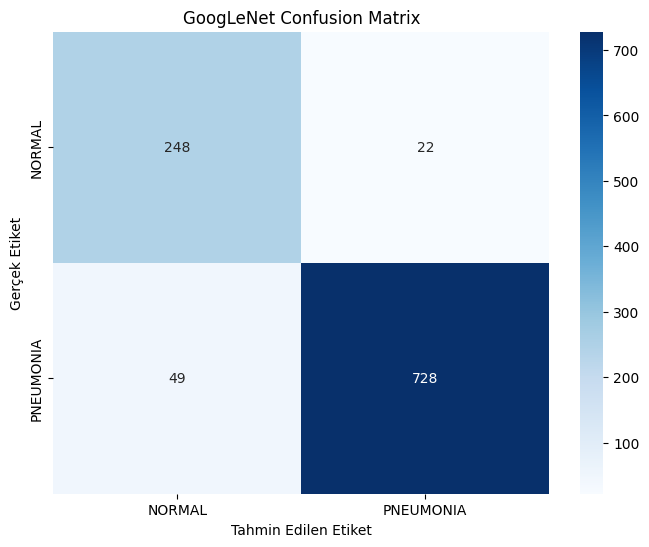

In [172]:
# Heatmap çizimi
plt.figure(figsize=(8, 6))
sns.heatmap(cm_GoogLeNet, annot=True, fmt="d", cmap="Blues", xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('GoogLeNet Confusion Matrix')
plt.show()

In [173]:
# ROC eğrisi oluşturma
fpr_GoogLeNet, tpr_GoogLeNet, thresholds_GoogLeNet = roc_curve(y_test, y_pred_prob_GoogLeNet)
roc_auc_GoogLeNet = auc(fpr_GoogLeNet, tpr_GoogLeNet)

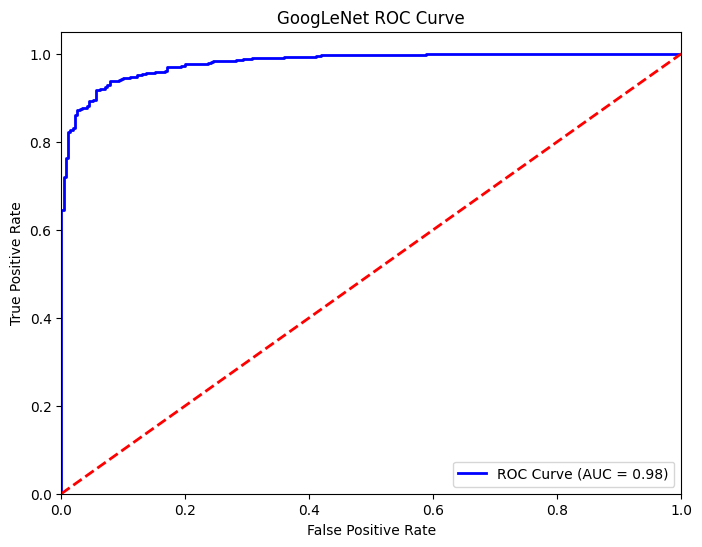

In [174]:
# ROC eğrisini çizme
plt.figure(figsize=(8, 6))
plt.plot(fpr_GoogLeNet, tpr_GoogLeNet, color='blue', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc_GoogLeNet)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GoogLeNet ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [175]:
# daha önce hiç görmediği veri kümesi üzerinde tahmin yapma
y_pred_prob_test_GoogLeNet = model_googlenet.predict(data_test)
y_pred_test_GoogLeNet = np.round(y_pred_prob_test_GoogLeNet).astype(int)

20/20 [==============================] - 4s 189ms/step


In [176]:
# Sınıflandırma raporunu oluşturma
print('GoogLeNet Ağı Sınıflandırma Raporu (Test)')
print(classification_report(labels_test, y_pred_test_GoogLeNet))

ResNet Ağı Sınıflandırma Raporu (Test)
              precision    recall  f1-score   support

           0       0.89      0.57      0.70       234
           1       0.79      0.96      0.86       390

    accuracy                           0.81       624
   macro avg       0.84      0.76      0.78       624
weighted avg       0.83      0.81      0.80       624



In [177]:
# Confusion matrix'i hesapla
cm_test_GoogLeNet = confusion_matrix(labels_test, y_pred_test_GoogLeNet)

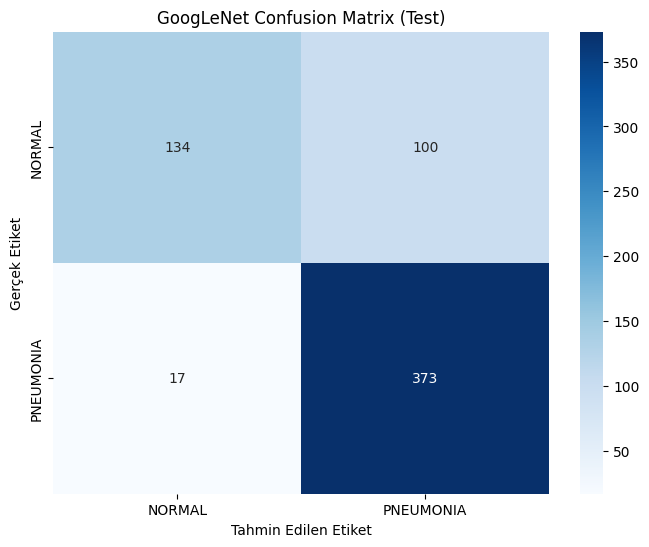

In [178]:
# Heatmap çizimi
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_GoogLeNet, annot=True, fmt="d", cmap="Blues", xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('GoogLeNet Confusion Matrix (Test)')
plt.show()

In [179]:
# ROC eğrisi oluşturma
fpr_test_GoogLeNet, tpr_test_GoogLeNet, thresholds_test_GoogLeNet = roc_curve(labels_test, y_pred_prob_test_GoogLeNet)
roc_auc_test_GoogLeNet = auc(fpr_test_GoogLeNet, tpr_test_GoogLeNet)

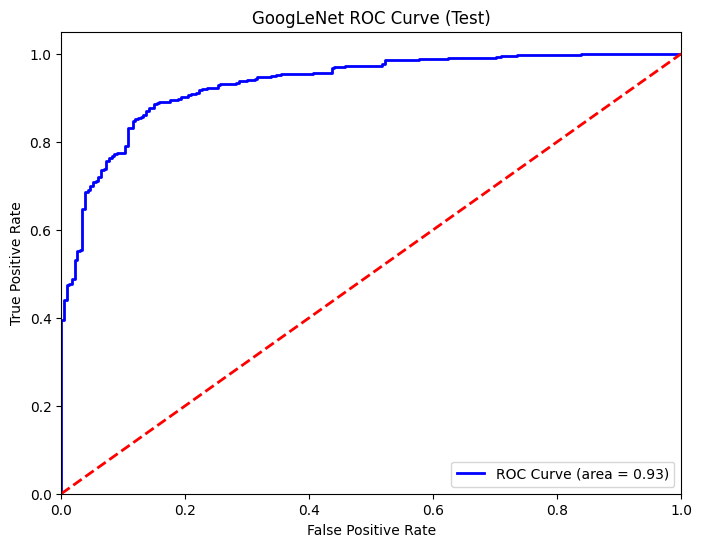

In [180]:
# ROC eğrisini çizme
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_GoogLeNet, tpr_test_GoogLeNet, color='blue', lw=2, label='ROC Curve (area = %0.2f)' % roc_auc_test_GoogLeNet)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GoogLeNet ROC Curve (Test)')
plt.legend(loc="lower right")
plt.show()

# Xception

In [183]:
base_model_xc = Xception(weights='imagenet', include_top=False, pooling='avg', input_shape=(224, 224, 3))

83683744/83683744 [==============================] - 17s 0us/step


In [187]:
# Taban modeldeki katmanları dondurma (eğitilebilirliklerini kapatma)
base_model_xc.trainable = False

In [188]:
# Modeli oluşturma
model_Xception = Sequential()

In [189]:
# Taban Modeli ekleme
model_Xception.add(base_model_xc)

# Batch Normalization (Mini-Batch Normalizasyonu)
model_Xception.add(BatchNormalization())

# Dropout Katmanı (0.45 oranında)
model_Xception.add(Dropout(0.45)) 

# Birinci Yoğun (Dense) Katman
model_Xception.add(Dense(220, activation='relu'))

# Dropout Katmanı (0.25 oranında)
model_Xception.add(Dropout(0.25)) 

# İkinci Yoğun (Dense) Katman
model_Xception.add(Dense(60, activation='relu'))

# Çıkış Katmanı
model_Xception.add(Dense(1, activation='sigmoid'))

In [190]:
# Modeli Derleme
model_Xception.compile(optimizer=Adamax(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [191]:
# Modelin özetini yazdırma
model_Xception.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 batch_normalization_9 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 dropout_13 (Dropout)        (None, 2048)              0         
                                                                 
 dense_14 (Dense)            (None, 220)               450780    
                                                                 
 dropout_14 (Dropout)        (None, 220)               0         
                                                                 
 dense_15 (Dense)            (None, 60)                13260     
                                                      

In [192]:
H_Xception = model_Xception.fit(
    datagen.flow(X_train, y_train, batch_size=bs),
    steps_per_epoch=len(X_train) // bs,
    validation_data=datagen.flow(X_test, y_test, batch_size=bs),
    validation_steps=len(X_test) // bs,
    epochs=30)

Epoch 1/30
130/130 [==============================] - 149s 1s/step - loss: 0.2786 - accuracy: 0.8825 - val_loss: 0.2489 - val_accuracy: 0.9307
Epoch 2/30
130/130 [==============================] - 147s 1s/step - loss: 0.2112 - accuracy: 0.9133 - val_loss: 0.1760 - val_accuracy: 0.9346
Epoch 3/30
130/130 [==============================] - 147s 1s/step - loss: 0.1989 - accuracy: 0.9237 - val_loss: 0.1632 - val_accuracy: 0.9404
Epoch 4/30
130/130 [==============================] - 148s 1s/step - loss: 0.1899 - accuracy: 0.9270 - val_loss: 0.1456 - val_accuracy: 0.9443
Epoch 5/30
130/130 [==============================] - 149s 1s/step - loss: 0.1802 - accuracy: 0.9278 - val_loss: 0.1378 - val_accuracy: 0.9434
Epoch 6/30
130/130 [==============================] - 148s 1s/step - loss: 0.1915 - accuracy: 0.9246 - val_loss: 0.1488 - val_accuracy: 0.9385
Epoch 7/30
130/130 [==============================] - 146s 1s/step - loss: 0.1700 - accuracy: 0.9338 - val_loss: 0.1157 - val_accuracy: 0.9609

In [193]:
# Eğitim sürecindeki kayıp değerlerini alın
train_loss_Xception= H_Xception.history['loss']
val_loss_Xception = H_Xception.history['val_loss']

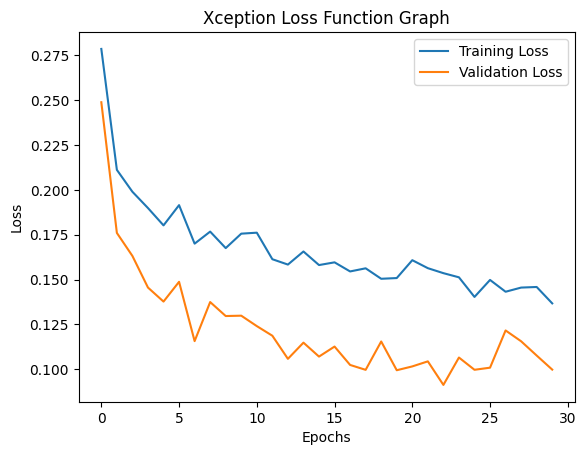

In [194]:
# Kayıp değerlerini çizdirme
plt.plot(train_loss_Xception, label='Training Loss')
plt.plot(val_loss_Xception, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Xception Loss Function Graph')
plt.show()

In [196]:
# Test veri kümesi üzerinde tahmin yapma
y_pred_prob_Xception = model_Xception.predict(X_test)
y_pred_Xception = np.round(y_pred_prob_Xception).astype(int)

33/33 [==============================] - 26s 776ms/step


In [197]:
# Sınıflandırma raporunu oluşturma
print('Xception Ağı Sınıflandırma Raporu')
print(classification_report(y_test, y_pred_Xception))

Xception Ağı Sınıflandırma Raporu
              precision    recall  f1-score   support

           0       0.74      0.99      0.85       270
           1       1.00      0.88      0.93       777

    accuracy                           0.91      1047
   macro avg       0.87      0.94      0.89      1047
weighted avg       0.93      0.91      0.91      1047



In [198]:
# Confusion matrix'i hesapla
cm_Xception = confusion_matrix(y_test, y_pred_Xception)

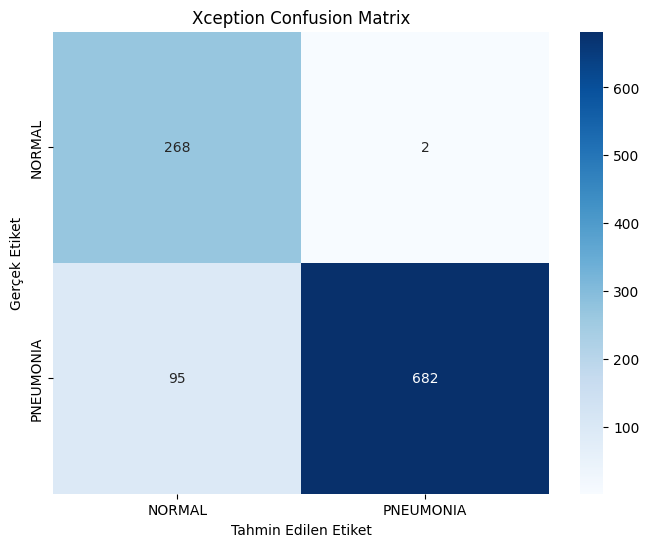

In [199]:
# Heatmap çizimi
plt.figure(figsize=(8, 6))
sns.heatmap(cm_Xception, annot=True, fmt="d", cmap="Blues", xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Xception Confusion Matrix')
plt.show()

In [200]:
# ROC eğrisi oluşturma
fpr_Xception, tpr_Xception, thresholds_Xception = roc_curve(y_test, y_pred_prob_Xception)
roc_auc_Xception = auc(fpr_Xception, tpr_Xception)

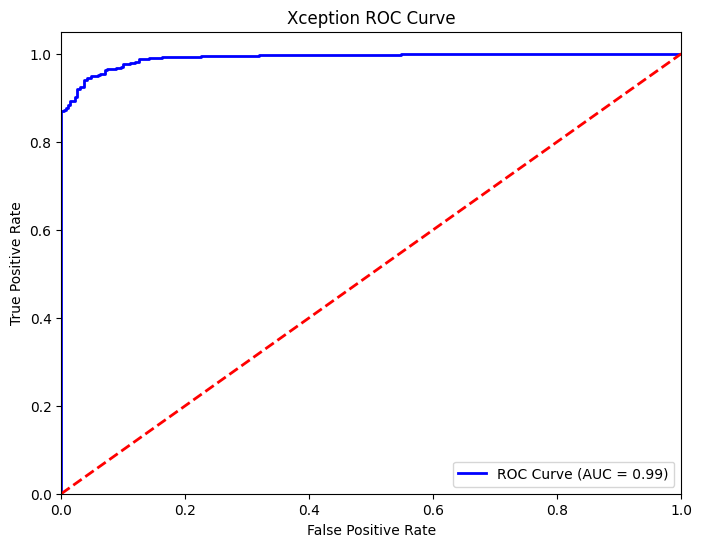

In [201]:
# ROC eğrisini çizme
plt.figure(figsize=(8, 6))
plt.plot(fpr_Xception, tpr_Xception, color='blue', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc_Xception)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Xception ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [202]:
# daha önce hiç görmediği veri kümesi üzerinde tahmin yapma
y_pred_prob_test_Xception = model_Xception.predict(data_test)
y_pred_test_Xception = np.round(y_pred_prob_test_Xception).astype(int)

20/20 [==============================] - 15s 750ms/step


In [203]:
# Sınıflandırma raporunu oluşturma
print('Xception Ağı Sınıflandırma Raporu (Test)')
print(classification_report(labels_test, y_pred_test_Xception))

Xception Ağı Sınıflandırma Raporu (Test)
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       234
           1       0.90      0.91      0.90       390

    accuracy                           0.88       624
   macro avg       0.87      0.87      0.87       624
weighted avg       0.88      0.88      0.88       624



In [204]:
# Confusion matrix'i hesapla
cm_test_Xception = confusion_matrix(labels_test, y_pred_test_Xception)

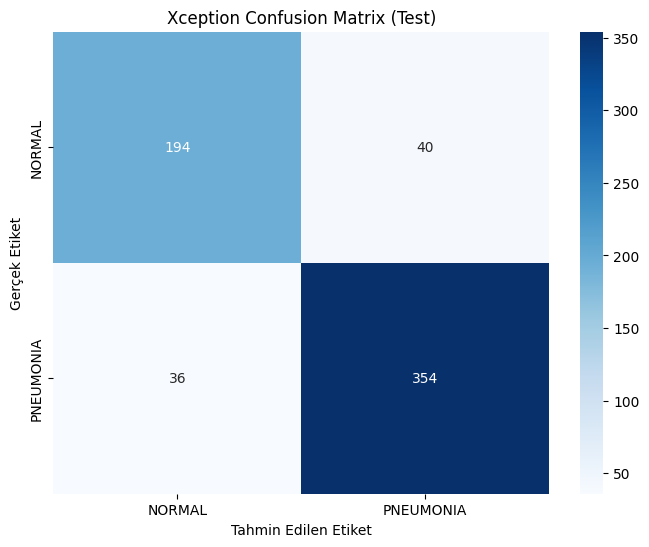

In [205]:
# Heatmap çizimi
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_Xception, annot=True, fmt="d", cmap="Blues", xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Xception Confusion Matrix (Test)')
plt.show()

In [206]:
# ROC eğrisi oluşturma
fpr_test_Xception, tpr_test_Xception, thresholds_test_Xception = roc_curve(labels_test, y_pred_prob_test_Xception)
roc_auc_test_Xception = auc(fpr_test_Xception, tpr_test_Xception)

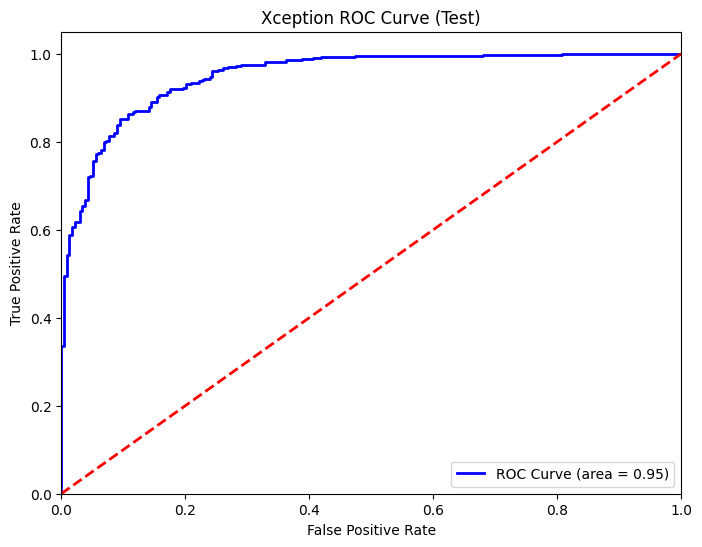

In [207]:
# ROC eğrisini çizme
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_Xception, tpr_test_Xception, color='blue', lw=2, label='ROC Curve (area = %0.2f)' % roc_auc_test_Xception)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Xception ROC Curve (Test)')
plt.legend(loc="lower right")
plt.show()